# Predicting and Aiding Post-partum Depression Symptoms via Talk-Bot


Members: Navina Amuthan, Uthara Rajesh, Harshaadhithya

# 1. About the Data

**Data Source**

[PostPartum Depression dataset from Kaggle](https://www.kaggle.com/datasets/parvezalmuqtadir2348/postpartum-depression)


**Postpartum Depression Background Information**


Postpartum depression, also called postnatal depression, is a type of mood disorder associated with childbirth. Medically referred as <i>major depression with postpartum onset</i>, it is defined as episodes of depression beginning within 4 weeks of giving birth - a time period corresponding to the rapid hormonal changes posited to contribute to vulnerability to depression. However, as psychosocial factors also play a major role in triggering postpartum depression, most researchers use a working definition of the postpartum period as lasting up to 6 months after delivery.<sup>[[1]](https://jamanetwork.com/journals/jama/article-abstract/194624)</sup>

The estimated prevalence of postpartum depression ranges from 6.5 to 12.9% or even higher in lower-income and middle-income countries.<sup>[[2]](https://www.nejm.org/doi/full/10.1056/nejmcp1607649)</sup>

Symptoms of postpartum depression often include sleep disturbance (beyond that associated with the care of the baby), anxiety, irritability, and a feeling of being overwhelmed, as well as an obsessional preoccupation with the baby’s health and feeding. Suicidal ideation and worries about causing harm to the baby have also been reported.<sup>[[3]](https://jamanetwork.com/journals/jamapsychiatry/article-abstract/1666651)</sup>

Early detection of symptoms and prompt initiation of treatment can greatly reduce adverse consequences. The use of screening tools, such as the Edinburgh Postnatal Depression Scale, is effective in increasing early diagnosis.<sup>[[1]](https://jamanetwork.com/journals/jama/article-abstract/194624)</sup>

**Data Background**

The authors of the dataset describe the data as originating from a questionnaire by a medical hospital. As this dataset does not contain a target variable `feeling depressed`, the authors explain that they used the variable **`feeling anxious`** as a reasonable predictor for postpartum depression.

**Data Dictionary**

|Variable|Key|
|:---|:---|
|Timestamp| mm/dd/yyyy hh:mm
|Age|25-30, 30-35, 35-40, 40-45, 45-50
|Feeling sad or tearful|yes, no, sometimes
|Irritable towards baby & partner|yes, no, sometimes
|Trouble sleeping at night|yes, no, two or more days a week
|Problems concentrating or making decision|yes, no, often
|Overeating or loss of appetite|yes, no, not at all
|Feeling anxious|yes, no
|Feeling of guilt|yes, no, maybe
|Problems of bonding with baby|yes, no, sometimes
|Suicide attempt|yes, no, not interested to say

---

# 2. Significance of the Project:

* Can survey data be used to predict if women are at risk of developing postnatal depression? 

Why is this important? Early detection of symptoms and prompt initiation of treatment can greatly reduce adverse consequences. Deploying a machine learning model as a self-assessment tool (online-survey, app) could empower women in seeking help early.

---

# 3. Documentation summary and data insights

Exploratory data analysis, insights drawn from it and model prediction outcomes can be summarized as follows: 

|||
|:---|:---|
|**Initial data exploration:**|* The data set contains 11 features (including timestamp) and 1503 observations
||* Feature timestamp was dropped
||* Column names were cleaned
||* Target variable `feeling_anxious` is slightly imbalanced (yes: 65%; no: 35%)
||* All features (except timestamp) are categorical and their datatype is object
||* Missing values (27 in total) were imputed using mode after grouping by age bracket
|**Data visualization:**|**Countplots:**
||* The target variable `feeling_anxious` seems to correlate negatively with `feeling_of_guilt` and positively with `problems_of_bonding_with_baby`
||* All other features seem not to show a correlation 
||**Feature correlation (Theil's U):**
||* `feeling_of_guilt` shows the strongest correlation (~25%) to the target variable `feeling_anxious`, i.e. knowing the value of `feeling_of_guilt` provides ~25% of the information regarding the target variable
|**Model prediction:**|* A total of 7 prediction models were used, one neural network-based model (fully connected) and six tree-based models (Decision Tree, Random Forest, AdaBoost, LightGBM, XGBoost, CatBoost)
||* Categorical variables were encoded as follows: Binary target variable `feeling_anxious` was encoded using label encoding, ordinal feature `age` was encoded using ordinal encoding and nominal features (all other variables) were encoded using dummy encoding
||* Encoding resulted in a total of 25 feature columns
||* Data was split into 80% train (1202 observations) and 20% test (301 observations)
||* Hyperparameter tuning was performed on all tree-based models. Tuning of LightGBM, XGBoost and CatBoost had only miniscule effect on model performance
||* The neural network model architecture was optimized by trial and error (e.g. by adjusting number of hidden layers and number of nodes) using learning curves of loss and accuracy as an assessment tool
||* CatBoost and XGBoost were the best performers (FN: 0, FP:0), closely followed by LightGBM (FN: 2, FP:0)
||* The neural network-based model performed slightly worse than LightGBM
||* Decision Tree and Random Forest were midfield
||* AdaBoost was the worst performer
||* Feature importance: Each tree-based model showed a slightly different order of feature importance, although in all models the feature `feeling_of_guilt` was the most important feature

**Model Performance Summary Table**

|Model|Mean CV Score$^{1}$|Accuracy|Precision|Recall|F1-Score|ROC_AUC
|:---|:---|:---|:---|:---|:---|:---|
|CatBoost|0.979|1.0|1.0|1.0|1.0|1.0 
|XGBoost|0.974|1.0|1.0|1.0|1.0|1.0 
|LightGBM|0.976|0.993|1.0|0.990|0.995|0.995
|Neural Network|n.d.$^{2}$|0.973|0.985|0.974|0.979|0.973
|Random Forest|0.900|0.870|0.894|0.908|0.901|0.854
|Decision Tree|0.878|0.877|0.904|0.908|0.906|0.864
|AdaBoost|0.849|0.844|0.853|0.918|0.885|0.812




---

# 4. Loading Python libraries

In [2]:
# !pip install dython

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import StrMethodFormatter
from colorama import Fore, Style
from dython.nominal import associations

import lightgbm
import xgboost
import catboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.config import list_physical_devices
from tensorflow.random import set_seed
set_seed(42)


In [5]:
# Check library version 
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Seaborn: ', sns.__version__)

Numpy:  1.21.6
Pandas:  1.3.5
Seaborn:  0.12.2


---

# 5. Exploratory data analysis

## 5.1. Loading data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'D:\Datasets\post natal data.csv')

## 5.2. Exploring and cleaning data

In [9]:
# Check data dimension
df.shape

(1503, 11)

In [ ]:
# Preview data
df.head(5)

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
 df.tail(5)

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No
1502,6/15/2022 0:36,45-50,Sometimes,Sometimes,Two or more days a week,No,No,No,Maybe,No,No


In [6]:
# Drop 'Timestamp'
df.drop('Timestamp', axis=1, inplace=True)

In [7]:
# Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("&", "and")

In [ ]:
df.head()

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_anxious,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
# Summarize data
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1503 entries, 0 to 1502

Data columns (total 10 columns):

 #   Column                                     Non-Null Count  Dtype 

---  ------                                     --------------  ----- 

 0   age                                        1503 non-null   object

 1   feeling_sad_or_tearful                     1503 non-null   object

 2   irritable_towards_baby_and_partner         1497 non-null   object

 3   trouble_sleeping_at_night                  1503 non-null   object

 4   problems_concentrating_or_making_decision  1491 non-null   object

 5   overeating_or_loss_of_appetite             1503 non-null   object

 6   feeling_anxious                            1503 non-null   object

 7   feeling_of_guilt                           1494 non-null   object

 8   problems_of_bonding_with_baby              1503 non-null   object

 9   suicide_attempt                            1503 non-null   object

dtypes: object(10)

memory

In [ ]:
# Generate descriptive statistics
df.describe(include='all').T

,count,unique,top,freq
age,1503,5,40-45,364
feeling_sad_or_tearful,1503,3,Yes,536
irritable_towards_baby_and_partner,1497,3,Yes,555
trouble_sleeping_at_night,1503,3,Two or more days a week,640
problems_concentrating_or_making_decision,1491,3,No,583
overeating_or_loss_of_appetite,1503,3,No,841
feeling_anxious,1503,2,Yes,980
feeling_of_guilt,1494,3,No,624
problems_of_bonding_with_baby,1503,3,No,557
suicide_attempt,1503,3,No,709


In [ ]:
# Get *absolute* counts of unique values for features based on dtypes
col_name = df.select_dtypes(include='object').columns

for index, col in enumerate(col_name):
    print(f'\033[1;3m{col_name[index]}:\033[0m\n{df[col].value_counts()}\n')

age:

40-45    364

35-40    349

30-35    338

45-50    271

25-30    181

Name: age, dtype: int64



feeling_sad_or_tearful:

Yes          536

No           524

Sometimes    443

Name: feeling_sad_or_tearful, dtype: int64



irritable_towards_baby_and_partner:

Yes          555

No           499

Sometimes    443

Name: irritable_towards_baby_and_partner, dtype: int64



trouble_sleeping_at_night:

Two or more days a week    640

Yes                        445

No                         418

Name: trouble_sleeping_at_night, dtype: int64



problems_concentrating_or_making_decision:

No       583

Often    473

Yes      435

Name: problems_concentrating_or_making_decision, dtype: int64



overeating_or_loss_of_appetite:

No            841

Yes           343

Not at all    319

Name: overeating_or_loss_of_appetite, dtype: int64



feeling_anxious:

Yes    980

No     523

Name: feeling_anxious, dtype: int64



feeling_of_guilt:

No       624

Maybe    528

Yes      342

Name: feeling

In [ ]:
# Get *relative* counts of unique values for features based on dtypes
col_name = df.select_dtypes(include='object').columns

for index, col in enumerate(col_name):
    print(f'\033[1;3m{col_name[index]} (%):\033[0m\n{np.round(df[col].value_counts(normalize=True)*100, 1)}\n')

age (%):

40-45    24.2

35-40    23.2

30-35    22.5

45-50    18.0

25-30    12.0

Name: age, dtype: float64



feeling_sad_or_tearful (%):

Yes          35.7

No           34.9

Sometimes    29.5

Name: feeling_sad_or_tearful, dtype: float64



irritable_towards_baby_and_partner (%):

Yes          37.1

No           33.3

Sometimes    29.6

Name: irritable_towards_baby_and_partner, dtype: float64



trouble_sleeping_at_night (%):

Two or more days a week    42.6

Yes                        29.6

No                         27.8

Name: trouble_sleeping_at_night, dtype: float64



problems_concentrating_or_making_decision (%):

No       39.1

Often    31.7

Yes      29.2

Name: problems_concentrating_or_making_decision, dtype: float64



overeating_or_loss_of_appetite (%):

No            56.0

Yes           22.8

Not at all    21.2

Name: overeating_or_loss_of_appetite, dtype: float64



feeling_anxious (%):

Yes    65.2

No     34.8

Name: feeling_anxious, dtype: float64



feeling_of

**Documentation**
* Target variable `feeling_anxious` is slightly imbalanced, but since decision tree-based models are used this will not be an issue

In [ ]:
# Check for missing values
df.isna().sum()

age                                           0
feeling_sad_or_tearful                        0
irritable_towards_baby_and_partner            6
trouble_sleeping_at_night                     0
problems_concentrating_or_making_decision    12
overeating_or_loss_of_appetite                0
feeling_anxious                               0
feeling_of_guilt                              9
problems_of_bonding_with_baby                 0
suicide_attempt                               0
dtype: int64

**Documentation**
* Data will be imputed before modelling using 'mode'

In [ ]:
# Alternatively, drop rows with missing values
# df.dropna(inplace=True) 
# df.isna().sum()

---

## 5.3. Visualizing data

### 5.3.1. Count plots

**Plotting the counts of observations in each categorical bin using bars**

In [ ]:
# Get list of available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn-dark-palette')

In [ ]:
val_yes, val_no = df['feeling_anxious'].value_counts(normalize=True)*100
val_yes, val_no

(65.20292747837658, 34.79707252162342)

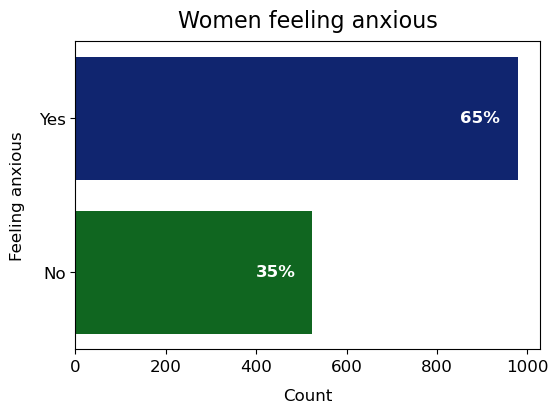

In [ ]:
# Count plot of target variable 'feeling_anxious'

plt.figure(figsize=(6,4))
sns.countplot(y='feeling_anxious', data=df)
plt.xlabel(xlabel='Count', fontsize=12, labelpad=10)
plt.ylabel(ylabel='Feeling anxious', fontsize=12, labelpad=10)
plt.text(x=850, y=0, s=str(int(np.round(val_yes))) + "%", fontsize=12, fontweight='bold', color='w', va='center')
plt.text(x=400, y=1, s=str(int(np.round(val_no))) + "%", fontsize=12, fontweight='bold', color='w', va='center')
plt.title(label='Women feeling anxious', fontsize=16, pad=10)
plt.tick_params(axis='both', labelsize=12);

**Documentation**

Target variable is slightly imbalanced

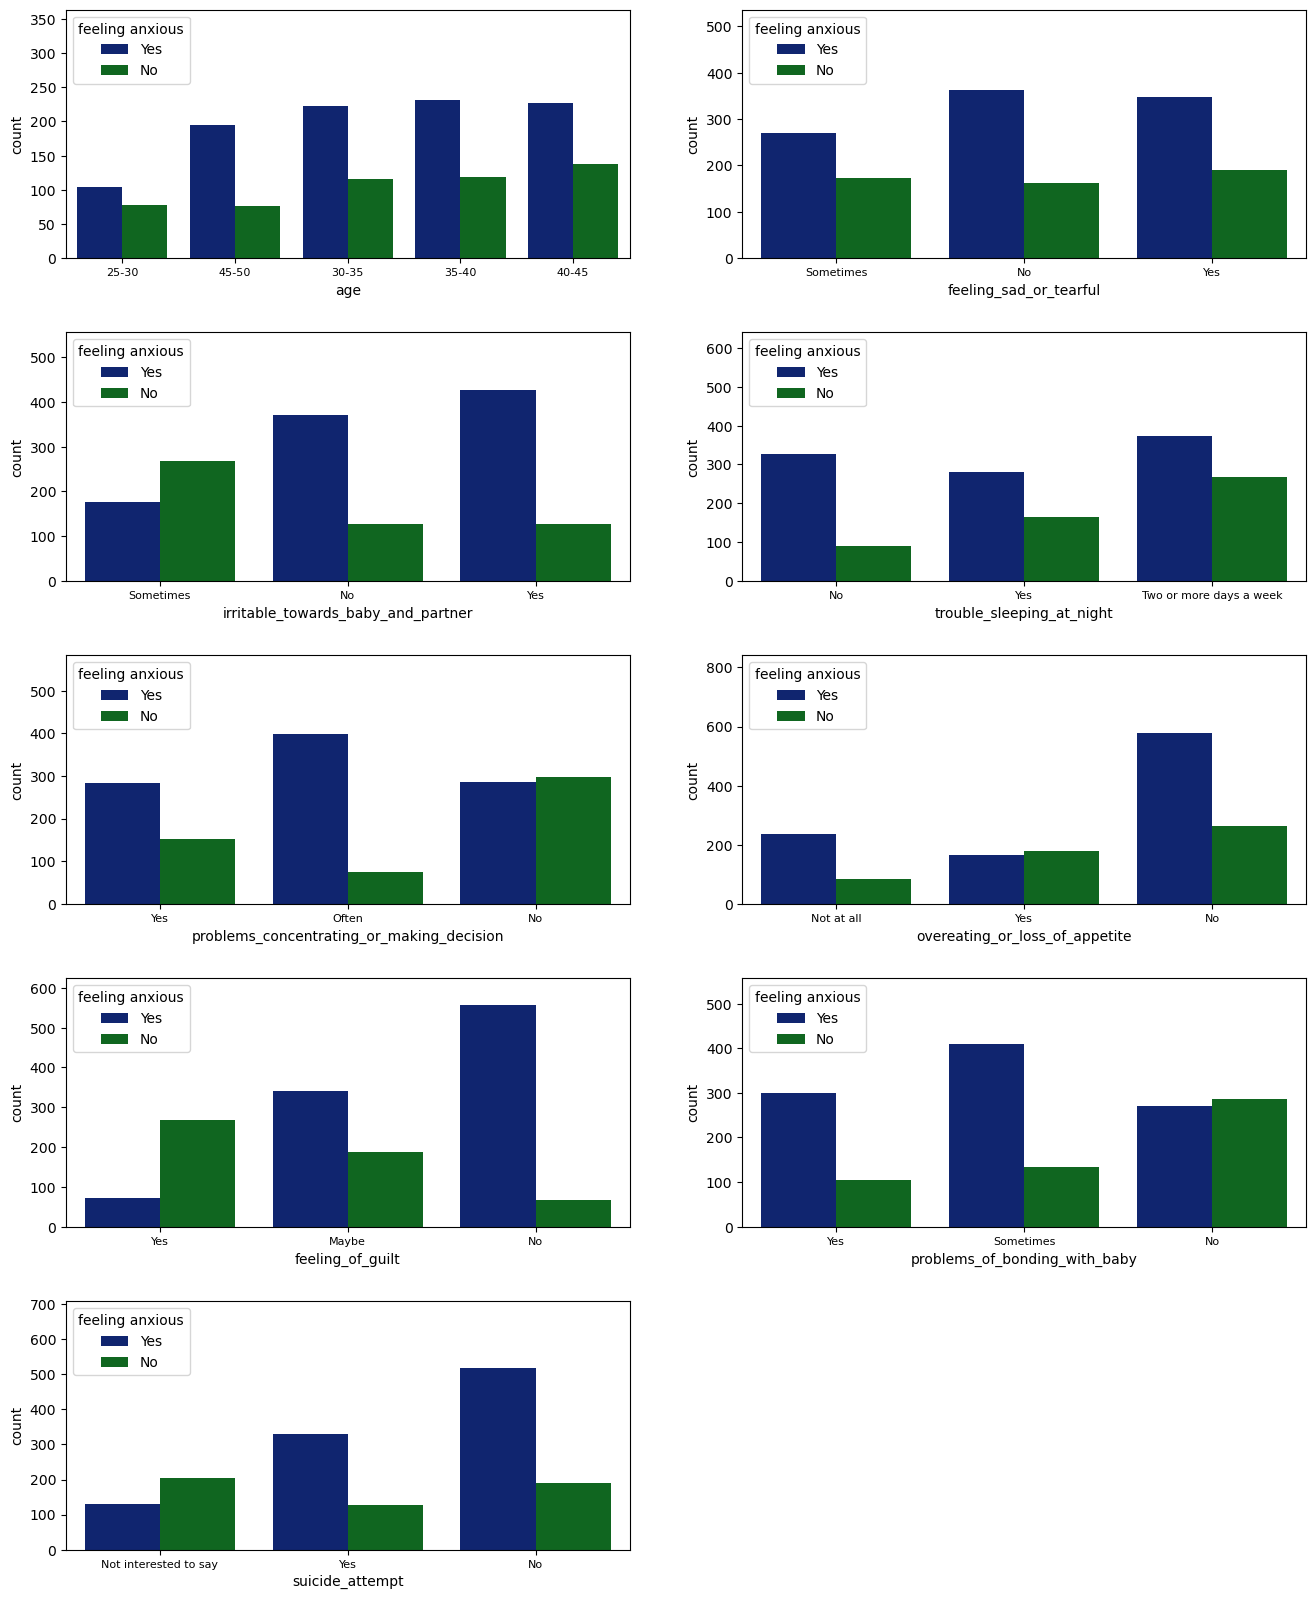

In [ ]:
# Count plots of feature variables 

# Features to plot
columns = [c for c in df.columns if c != 'feeling_anxious']
    
# Creating subplot axes
fig, axes = plt.subplots(5, 2, figsize=(16,20), sharey=False)
axes[4,1].set_axis_off()

# Iterating through axes and columns
for name, ax in zip(columns, axes.flatten()):
    sns.countplot(x=name, hue='feeling_anxious', data=df, order=df[name].value_counts(ascending=True).index, ax=ax)
    ax.tick_params(axis='x', labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax.set_ylim([0, max(df[name].value_counts())])
    ax.legend(title='feeling anxious', loc='upper left')
    plt.subplots_adjust(hspace=0.3);

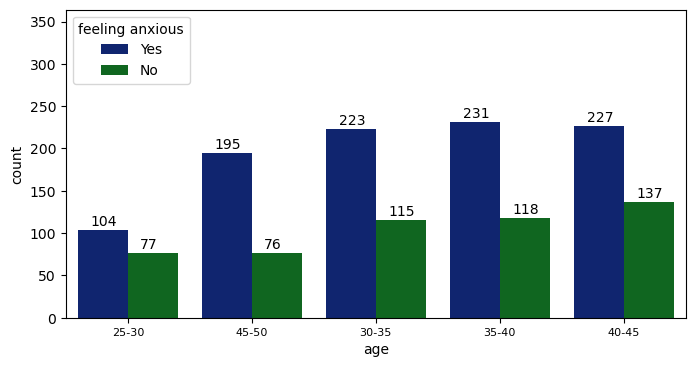

In [ ]:
# Count plot of feature variable 'age' with annotation

# Feature to plot
name = 'age'
    
# Creating subplot axes
fig, ax = plt.subplots(1, 1, figsize=(8,4), sharey=False)
# axes[2,1].set_axis_off()

sns.countplot(x=name, hue='feeling_anxious', data=df, order=df[name].value_counts(ascending=True).index, ax=ax)
ax.tick_params(axis='x', labelsize=8)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.subplots_adjust(hspace=0.3)
ax.set_ylim([0, max(df[name].value_counts())])
ax.legend(title='feeling anxious', loc='upper left')

for p in ax.patches:
    txt = str(int(np.round(p.get_height())))
    x = p.get_x()+0.1
    y = p.get_height()+5
    ax.text(x, y, txt);   

**Documentation**

From the count plot one could deduce the correlation with 'feeling anxious' is:
* negative with 'feeling of guilt'
* positive with 'problems of bonding with baby'

All other features seem not to show a correlation 

### 5.3.2. Feature correlation: Theil's U (Uncertainty Coefficient)

Theil's U, also known as the Uncertainty Coefficient, calculates statistic for categorical-categorical association. Formaly marked as U(x|y), this coefficient provides a value in the range of [0,1], where 0 means y provides no information about x, and 1 means y provides full information about x.

How to read the Theil's U heatmap:
* Knowing the value of feature on the y-axis
* Provides information regarding feature on the x-axis

In [ ]:
# Moving target variable to last position in df
df_corr = df.copy()
df_corr['feeling_anxious'] = df_corr.pop('feeling_anxious')
df_corr.head()

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt,feeling_anxious
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes


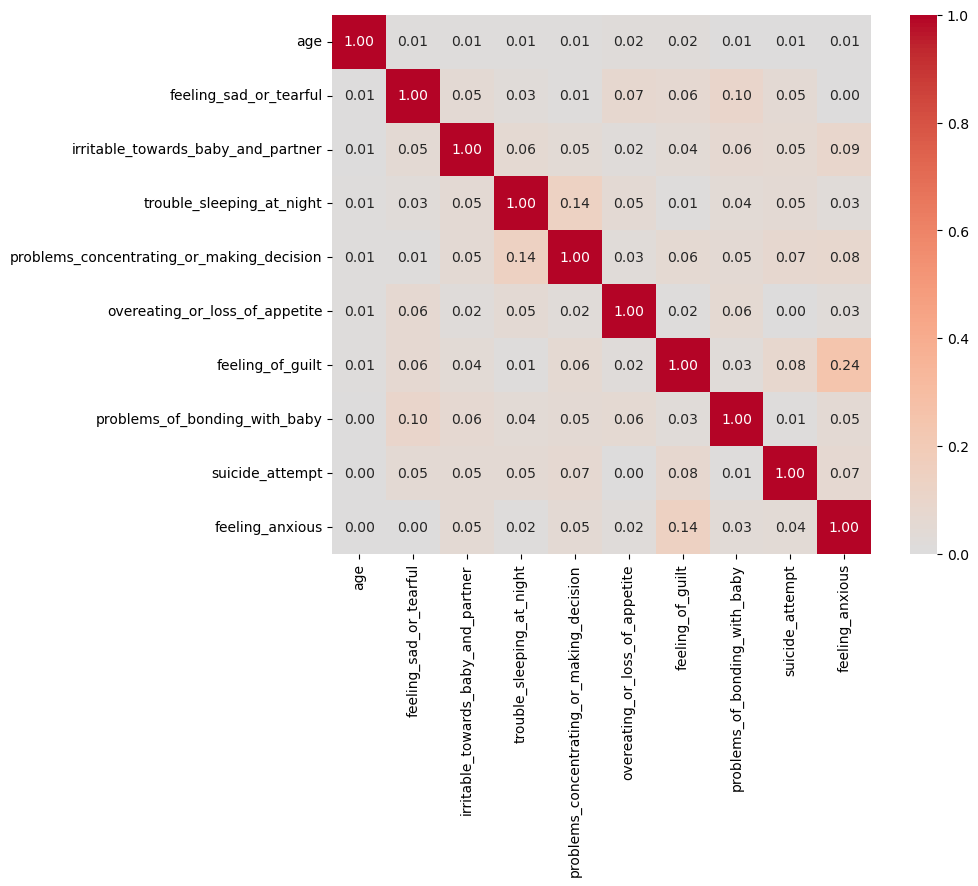

In [ ]:
# Generating Theil’s U pairwise association plot
fig, ax = plt.subplots(figsize = (10, 7))

# Estimate and generate Theil's U association plot
theils_u = associations(df_corr, nom_nom_assoc='theil', vmin=0, vmax=1, cmap="coolwarm", fmt='.2f', ax=ax)

In [ ]:
theils_u["corr"]

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt,feeling_anxious
age,1.000000,0.008947,0.010580,0.012697,0.014135,0.019425,0.016095,0.007214,0.007487,0.006077
feeling_sad_or_tearful,0.006194,1.000000,0.047732,0.030860,0.009948,0.071144,0.064630,0.099432,0.049133,0.003825
irritable_towards_baby_and_partner,0.007465,0.048644,1.000000,0.055729,0.046855,0.020512,0.043094,0.064363,0.054936,0.092379
trouble_sleeping_at_night,0.008667,0.030428,0.053918,1.000000,0.137812,0.051807,0.014585,0.041390,0.053293,0.025662
problems_concentrating_or_making_decision,0.010085,0.010252,0.047381,0.144037,1.000000,0.027896,0.056865,0.050888,0.074362,0.083646
overeating_or_loss_of_appetite,0.012170,0.064382,0.018215,0.047548,0.024496,1.000000,0.015452,0.056125,0.001939,0.030013
feeling_of_guilt,0.011192,0.064915,0.042472,0.014857,0.055423,0.017151,1.000000,0.030635,0.081362,0.244971
problems_of_bonding_with_baby,0.004966,0.098857,0.062792,0.041735,0.049094,0.061662,0.030324,1.000000,0.014656,0.054469
suicide_attempt,0.004975,0.047164,0.051746,0.051883,0.069266,0.002057,0.077758,0.014150,1.000000,0.065588
feeling_anxious,0.002482,0.002257,0.053486,0.015357,0.047892,0.019569,0.143909,0.032326,0.040315,1.000000


**Documentation**

* 'Feeling of guilt' shows the strongest correlation (~25%) to the target variable `feeling_anxious`, i.e. knowing the value of 'feeling of guilt' provides ~25% of the information regarding the target variable

---

# 6. Modelling

## 6.1. Functions 

### 6.1.1. Summary report

In [8]:
def summary_report_tree(model, X_test, y_test):
    """
    * Summary Report for Tree-based Models *
    
    Function to generate predictions and probabilities on input data, 
    output model performance indicators and 
    plot confusion matrix, precision-recall and ROC curve
    """
    # Make prediction on input data
    y_pred = model.predict(X_test)
    
    # Generate prediction probabilities for input data
    y_test_prob = model.predict_proba(X_test)[:,1]
                       
    # Model performance    
    accuracy_ = accuracy_score(y_test, y_pred)
    precision_ = precision_score(y_test, y_pred)
    recall_ = recall_score(y_test, y_pred)
    f1_ = f1_score(y_test, y_pred)
    roc_auc_ = roc_auc_score(y_test, y_pred)

    print(f'\033[1mSummary Report\033[0m')
    print(f'\033[1mAccuracy:  {accuracy_:.2f}\033[0m [TP / N] Proportion of predicted labels that match true labels')
    print(f'\033[1mPrecision: {precision_:.2f}\033[0m [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative')
    print(f'\033[1mRecall:    {recall_:.2f}\033[0m [TP / (TP + FN)] Ability of the classifier to find all positive samples')
    print(f'\033[1mF1-score:  {f1_:.2f}\033[0m [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall')
    print(f'\033[1mROC AUC:   {roc_auc_:.2f}\033[0m')
    print(113*'-')
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')
    print(113*'-', '\n')
    
    # Confusion Matrix
    mat = confusion_matrix(y_test, y_pred)
    
    # Precision/Recall
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
    labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(mat, annot=labels, cmap=plt.cm.Blues, fmt="", ax=ax[0])
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate (1-specificity)')
    ax[2].set_ylabel('True Positive Rate (sensitivity)')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')
    
    plt.show()
    
    return accuracy_, precision_, recall_, f1_, roc_auc_

In [9]:
def summary_report_nn(model, X_test, y_test):
    """
    * Summary Report for Neural Network-based Models *
    
    Function to generate predictions and probabilities on input data, 
    output model performance indicators and 
    plot confusion matrix, precision-recall and ROC curve
    """
    # Make prediction on input data
    y_pred = ((model.predict(X_test)>0.5)*1).flatten()
    
    # Generate prediction probabilities for input data
    y_test_prob = model.predict(X_test)
                       
    # Model performance    
    accuracy_ = accuracy_score(y_test, y_pred)
    precision_ = precision_score(y_test, y_pred)
    recall_ = recall_score(y_test, y_pred)
    f1_ = f1_score(y_test, y_pred)
    roc_auc_ = roc_auc_score(y_test, y_pred)

    print(f'\n\033[1mSummary Report\033[0m')
    print(f'\033[1mAccuracy:  {accuracy_:.2f}\033[0m [TP / N] Proportion of predicted labels that match true labels')
    print(f'\033[1mPrecision: {precision_:.2f}\033[0m [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative')
    print(f'\033[1mRecall:    {recall_:.2f}\033[0m [TP / (TP + FN)] Ability of the classifier to find all positive samples')
    print(f'\033[1mF1-score:  {f1_:.2f}\033[0m [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall')
    print(f'\033[1mROC AUC:   {roc_auc_:.2f}\033[0m')
    print(113*'-')
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')
    print(113*'-', '\n')
    
    # Confusion Matrix
    mat = confusion_matrix(y_test, y_pred)
    
    # Precision/Recall
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
    labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(mat, annot=labels, cmap=plt.cm.Blues, fmt="", ax=ax[0])
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate (1-specificity)')
    ax[2].set_ylabel('True Positive Rate (sensitivity)')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')
    
    plt.show()
    
    return accuracy_, precision_, recall_, f1_, roc_auc_

### 6.1.2. Feature importance

In [10]:
def plot_feature_importance(data, dist):
    """
    Function to plot feature importance
    """
    fig, ax = plt.subplots(1, 1, figsize=(6,8), sharey=False)
        
    sns.barplot(x='feature_importance', y='feature', data=data)
    ax.set_xlabel(xlabel='Feature importance', fontsize=12, labelpad=10)
    ax.set_ylabel(ylabel='Feature', fontsize=12, labelpad=10)
    ax.set_title(label='Feature importance', fontsize=16, pad=10)
    ax.tick_params(axis='both', labelsize=9)
    ax.set_xlim([0, max(data['feature_importance'])*1.2])
    
    for p in ax.patches:
        width = p.get_width()
        x = p.get_width() + dist
        y = p.get_y()+0.55 * p.get_height()
        plt.text(x, y, '{:1.2f}'.format(width), ha='center', va='center');

### 6.1.3. Learning curves

In [11]:
def learning_curve_lightgbm(history):
    """
    Function to plot learning curves
    """
    plt.figure(figsize=(6,4))
    plt.plot(history['training']['binary_logloss'], color="r", label="Training")
    plt.plot(history['valid_1']['binary_logloss'], color="b", label="Testing")
    plt.legend(loc="upper right")
    plt.xlabel("Number of iterations", fontsize=16)
    plt.ylabel("logloss", fontsize=16)
    plt.ylim([0, max(history['training']['binary_logloss'])+0.1])
    plt.title(f"Learning Curves: LightGBM", fontsize=16);

In [12]:
def learning_curve_xgboost(history):
    """
    Function to plot learning curves
    """
    plt.figure(figsize=(6,4))
    plt.plot(history['validation_0']['logloss'], color="r", label="Training")
    plt.plot(history['validation_1']['logloss'], color="b", label="Testing")
    plt.legend(loc="upper right")
    plt.xlabel("Number of iterations", fontsize=16)
    plt.ylabel("logloss", fontsize=16)
    plt.ylim([0, max(history['validation_0']['logloss'])+0.1])
    plt.title(f"Learning Curves: XGBoost", fontsize=16);

In [13]:
def learning_curve_catboost(history):
    """
    Function to plot learning curves
    """
    plt.figure(figsize=(6,4))
    plt.plot(history['validation_0']['Logloss'], color="r", label="Training")
    plt.plot(history['validation_1']['Logloss'], color="b", label="Testing")
    plt.legend(loc="upper right")
    plt.xlabel("Number of iterations", fontsize=16)
    plt.ylabel("logloss", fontsize=16)
    plt.ylim([0, max(history['validation_0']['Logloss'])+0.1])
    plt.title(f"Learning Curves: CatBoost", fontsize=16);

In [14]:
def learning_curve_nn(history):
    """
    Function to plot training and validation loss and accuracy
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        
    ax[0].plot(history.history["loss"], color="r", label="Training Loss")
    ax[0].plot(history.history["val_loss"], color="b", label="Validation Loss")
    ax[0].legend(loc="upper right")
    ax[0].set_xlabel("Epoch", fontsize=14)
    ax[0].set_ylabel("Loss", fontsize=14)
    ax[0].set_ylim([0, max(history.history["loss"])+1])
    ax[0].set_title("Training and Validation Loss", fontsize=16)
    
    ax[1].plot(history.history["accuracy"], color="r", label="Training Loss")
    ax[1].plot(history.history["val_accuracy"], color="b", label="Validation Loss")
    ax[1].legend(loc="best")
    ax[1].set_xlabel("Epoch", fontsize=14)
    ax[1].set_ylabel("Accuracy", fontsize=14)
    ax[1].set_ylim([0, max(history.history["accuracy"])+0.05])
    ax[1].set_title("Training and Validation Accuracy", fontsize=16);    

## 6.2. Data pre-processing

### 6.2.1. Data input

In [15]:
# Shuffle data
df = shuffle(df, random_state=42)

In [16]:
# Define features and target
target = 'feeling_anxious'

X = df.drop(columns=target, axis=1).copy()
y = df[target].copy()

In [ ]:
X.head(3)

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt
51,40-45,No,Yes,Two or more days a week,No,No,No,No,Yes
1465,30-35,Sometimes,No,No,Often,No,Maybe,Yes,No
184,35-40,Sometimes,Yes,Yes,No,Yes,Yes,No,Not interested to say


In [ ]:
y[:5]

51      Yes
1465    Yes
184      No
1000    Yes
746     Yes
Name: feeling_anxious, dtype: object

### 6.2.2. Missing value imputation

In [ ]:
# Group dataset by age bracket and fill missing values with the value that appears most often using 'mode'
columns = ['irritable_towards_baby_and_partner',
           'problems_concentrating_or_making_decision',
           'feeling_of_guilt']

for name in columns:
    X[name] = X.groupby(by='age')[name].apply(lambda x: x.fillna(x.mode()[0]))    

In [20]:
# Check for missing values
X.isna().sum()

age                                          0
feeling_sad_or_tearful                       0
irritable_towards_baby_and_partner           0
trouble_sleeping_at_night                    0
problems_concentrating_or_making_decision    0
overeating_or_loss_of_appetite               0
feeling_of_guilt                             0
problems_of_bonding_with_baby                0
suicide_attempt                              0
dtype: int64

**Encoding**

Categorical variables are:
* Binary (*feeling_anxious*) &rarr; label encoding
* Ordinal (*age*) &rarr; ordinal encoding
* Nominal (all other variables) &rarr; dummy encoding

### 6.2.3. Ordinal encoding 

In [21]:
# Create map for age group
age_group = {'25-30': 1,
             '30-35': 2,
             '35-40': 3,
             '40-45': 4,
             '45-50': 5}

In [22]:
# Map age group
X['age'] = X['age'].map(age_group)

In [ ]:
X.sample(3)

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt
75,2,No,No,Two or more days a week,Often,Yes,Yes,Sometimes,No
540,4,No,Yes,No,Yes,No,No,Yes,No
311,4,Sometimes,No,No,Often,No,Maybe,Yes,No


### 6.2.4. Dummy encoding

In [23]:
X = pd.get_dummies(data = X, columns = X.columns[1:])
X.head()

,age,feeling_sad_or_tearful_No,feeling_sad_or_tearful_Sometimes,feeling_sad_or_tearful_Yes,irritable_towards_baby_and_partner_No,irritable_towards_baby_and_partner_Sometimes,irritable_towards_baby_and_partner_Yes,trouble_sleeping_at_night_No,trouble_sleeping_at_night_Two or more days a week,trouble_sleeping_at_night_Yes,...,overeating_or_loss_of_appetite_Yes,feeling_of_guilt_Maybe,feeling_of_guilt_No,feeling_of_guilt_Yes,problems_of_bonding_with_baby_No,problems_of_bonding_with_baby_Sometimes,problems_of_bonding_with_baby_Yes,suicide_attempt_No,suicide_attempt_Not interested to say,suicide_attempt_Yes
51,4,1,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1465,2,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
184,3,0,1,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,1,0
1000,3,1,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
746,2,1,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1


### 6.2.5. Split dataset

In [24]:
# Split dataset
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=test_size, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1202, 25), (1202,), (301, 25), (301,))

In [ ]:
X_train[:2]

,age,feeling_sad_or_tearful_No,feeling_sad_or_tearful_Sometimes,feeling_sad_or_tearful_Yes,irritable_towards_baby_and_partner_No,irritable_towards_baby_and_partner_Sometimes,irritable_towards_baby_and_partner_Yes,trouble_sleeping_at_night_No,trouble_sleeping_at_night_Two or more days a week,trouble_sleeping_at_night_Yes,...,overeating_or_loss_of_appetite_Yes,feeling_of_guilt_Maybe,feeling_of_guilt_No,feeling_of_guilt_Yes,problems_of_bonding_with_baby_No,problems_of_bonding_with_baby_Sometimes,problems_of_bonding_with_baby_Yes,suicide_attempt_No,suicide_attempt_Not interested to say,suicide_attempt_Yes
133,4,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
35,2,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
y_train[:5]

133      No
35      Yes
984     Yes
110     Yes
1465    Yes
Name: feeling_anxious, dtype: object

In [ ]:
y_test[:5]

583     No
851     No
616     No
707    Yes
354    Yes
Name: feeling_anxious, dtype: object

### 6.2.6. Label encoding

In [25]:
# Label encoding
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print(y_train.shape, y_test.shape)
y_train

(1202,) (301,)


array([0, 1, 1, ..., 0, 0, 1])

## 6.3. Tree-based models

In [26]:
plt.style.use('default')

### 6.3.1. Decision Tree

In [167]:
# Accuracy score: Evaluate model against training set 
dtc.score(X_train, y_train)

0.8419301164725458

In [168]:
# Accuracy score: Evaluate model against testing set 
dtc.score(X_test, y_test)

0.8438538205980066

**&rarr; Model is not over-fitted**

**Hyperparameter Tuning**

In [170]:
# best_score_: Mean cross-validated score of the best_estimator
# best_params_: Parameter setting that gave the best results on the hold out data

print(dtc_gs.best_score_, dtc_gs.best_params_)

0.881935261707989 {'max_depth': 5, 'min_samples_leaf': 0.01, 'min_samples_split': 2}


In [172]:
# Accuracy score: Evaluate model against training set 
dtc_gs.score(X_train, y_train)

0.8951747088186356

In [173]:
# Accuracy score: Evaluate model against testing set 
dtc_gs.score(X_test, y_test)

0.8770764119601329

**&rarr; Model is not over-fitted**

**Cross-Validation**

In [174]:
%%time 

# Cross-validation using best estimator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(dtc_gs.best_estimator_, X_train, y_train, cv=cv)

print(f'Scores:\n{scores}\n')
print(f'\033[1;3mDecision Tree; Cross-validation mean accuracy score and standard deviation: {scores.mean():.3f} +/-{scores.std():.3f}\033[0m')

Scores:

[0.82644628 0.85123967 0.9        0.89166667 0.90833333 0.94166667

 0.85       0.83333333 0.90833333 0.90833333 0.94214876 0.87603306

 0.85       0.875      0.91666667 0.81666667 0.86666667 0.875

 0.86666667 0.89166667 0.8677686  0.89256198 0.88333333 0.875

 0.875      0.89166667 0.85       0.85833333 0.86666667 0.88333333]



Decision Tree; Cross-validation mean accuracy score and standard deviation: 0.878 +/-0.030

CPU times: total: 172 ms

Wall time: 174 ms


**Feature Importance**

In [175]:
# Feature importance
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.01, random_state=42)
dtc.fit(X_train, y_train)

dtc_feature_importance = pd.DataFrame(zip(X_train.columns, dtc.feature_importances_), columns=['feature', 'feature_importance']).sort_values(by='feature_importance', ascending=False)
dtc_feature_importance

,feature,feature_importance
18,feeling_of_guilt_Yes,0.370196
11,problems_concentrating_or_making_decision_Often,0.164516
5,irritable_towards_baby_and_partner_Sometimes,0.109982
6,irritable_towards_baby_and_partner_Yes,0.047671
9,trouble_sleeping_at_night_Yes,0.044691
14,overeating_or_loss_of_appetite_Not at all,0.042118
4,irritable_towards_baby_and_partner_No,0.041952
13,overeating_or_loss_of_appetite_No,0.037007
16,feeling_of_guilt_Maybe,0.032904
23,suicide_attempt_Not interested to say,0.026226


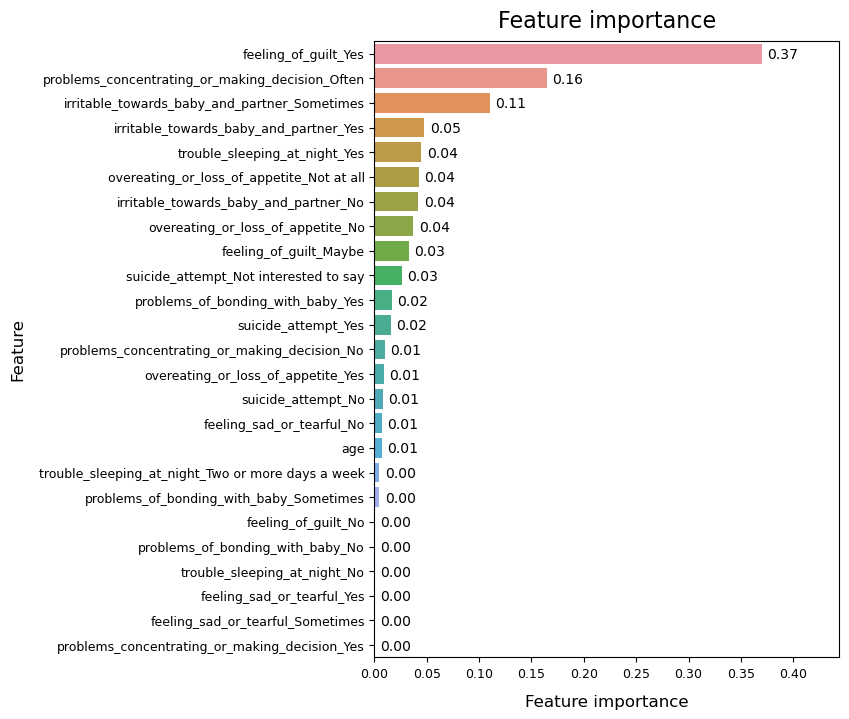

In [176]:
plot_feature_importance(dtc_feature_importance, dist=0.02)

### 6.3.2. Random Forest

In [178]:
# Accuracy score: Evaluate model against training set 
rfc.score(X_train, y_train)

0.846089850249584

In [179]:
# Accuracy score: Evaluate model against testing set 
rfc.score(X_test, y_test)

0.840531561461794

**&rarr; Model is not over-fitted**

**Hyperparameter Tuning**

In [181]:
# best_score_: Mean cross-validated score of the best_estimator
# best_params_: Parameter setting that gave the best results on the hold out data

print(rfc_gs.best_score_, rfc_gs.best_params_)

0.9026997245179065 {'max_depth': 6, 'min_samples_leaf': 0.01, 'min_samples_split': 2, 'n_estimators': 100}


In [183]:
# Accuracy score: Evaluate model against training set 
rfc_gs.score(X_train, y_train)

0.910981697171381

In [184]:
# Accuracy score: Evaluate model against testing set 
rfc_gs.score(X_test, y_test)

0.8704318936877077

In [185]:
# 5% range of training set accuracy
rfc_gs.score(X_train, y_train) - (rfc_gs.score(X_train, y_train) * 0.05)

0.865432612312812

**&rarr; Model might be on the edge of being over-fitted**

**Cross-Validation**

In [186]:
%%time 

# Cross-validation using best estimator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(rfc_gs.best_estimator_, X_train, y_train, cv=cv, n_jobs=-1)

print(f'Scores:\n{scores}\n')
print(f'\033[1;3mRandom Forest; Cross-validation mean accuracy score and standard deviation: {scores.mean():.3f} +/-{scores.std():.3f}\033[0m')

Scores:

[0.89256198 0.8677686  0.925      0.9        0.90833333 0.94166667

 0.84166667 0.86666667 0.925      0.95833333 0.95041322 0.94214876

 0.91666667 0.925      0.925      0.825      0.86666667 0.9

 0.83333333 0.9        0.91735537 0.90909091 0.89166667 0.89166667

 0.90833333 0.90833333 0.88333333 0.90833333 0.89166667 0.89166667]



Random Forest; Cross-validation mean accuracy score and standard deviation: 0.900 +/-0.032

CPU times: total: 5.22 s

Wall time: 5.22 s


**Feature Importance**

The higher the value for feature importance, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the **Gini importance**

In [187]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=2 , min_samples_leaf=0.01 , random_state=42)
rfc.fit(X_train, y_train)

# Compile feature importance 
rfc_feature_importance = pd.DataFrame(zip(X_train.columns, rfc.feature_importances_), columns=['feature', 'feature_importance']).sort_values(by='feature_importance', ascending=False)
rfc_feature_importance

,feature,feature_importance
18,feeling_of_guilt_Yes,0.210544
17,feeling_of_guilt_No,0.117060
5,irritable_towards_baby_and_partner_Sometimes,0.074113
19,problems_of_bonding_with_baby_No,0.063565
23,suicide_attempt_Not interested to say,0.061301
15,overeating_or_loss_of_appetite_Yes,0.046101
10,problems_concentrating_or_making_decision_No,0.045637
16,feeling_of_guilt_Maybe,0.044722
11,problems_concentrating_or_making_decision_Often,0.037012
6,irritable_towards_baby_and_partner_Yes,0.027997


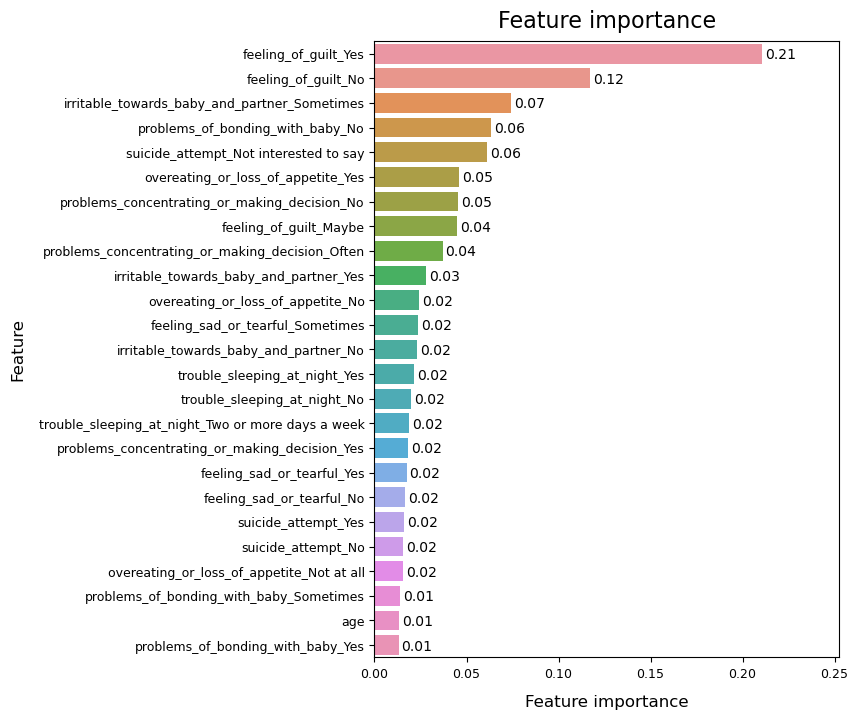

In [188]:
# Plot feature importance 
plot_feature_importance(rfc_feature_importance, dist=0.01)

### 6.3.3. AdaBoost

In [190]:
# Accuracy score: Evaluate model against training set 
ada.score(X_train, y_train)

0.8211314475873545

In [191]:
# Accuracy score: Evaluate model against testing set 
ada.score(X_test, y_test)

0.8073089700996677

**&rarr; Model is not over-fitted**

**Hyperparameter Tuning**

In [193]:
# best_score_: Mean cross-validated score of the best_estimator
# best_params_: Parameter setting that gave the best results on the hold out data

print(ada_gs.best_score_, ada_gs.best_params_)

0.851935261707989 {'learning_rate': 0.01, 'n_estimators': 400}


In [195]:
# Accuracy score: Evaluate model against training set 
ada_gs.score(X_train, y_train)

0.8527454242928453

In [196]:
# Accuracy score: Evaluate model against testing set 
ada_gs.score(X_test, y_test)

0.8438538205980066

**&rarr; Model is not over-fitted**

**Cross-Validation**

In [197]:
%%time 

# Cross-validation using best estimator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(ada_gs.best_estimator_, X_train, y_train, cv=cv, n_jobs=-1)

print(f'Scores:\n{scores}\n')
print(f'\033[1;3mAdaBoost; Cross-validation mean accuracy score and standard deviation: {scores.mean():.3f} +/-{scores.std():.3f}\033[0m')

Scores:

[0.84297521 0.83471074 0.85833333 0.85833333 0.84166667 0.86666667

 0.81666667 0.85833333 0.85833333 0.88333333 0.90909091 0.87603306

 0.88333333 0.86666667 0.84166667 0.8        0.81666667 0.83333333

 0.81666667 0.85       0.85950413 0.85950413 0.8        0.83333333

 0.875      0.84166667 0.81666667 0.875      0.84166667 0.85833333]



AdaBoost; Cross-validation mean accuracy score and standard deviation: 0.849 +/-0.025

CPU times: total: 23.7 s

Wall time: 23.7 s


**Feature Importance**

In [198]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.01, random_state=42)
ada.fit(X_train, y_train)

# Compile feature importance 
ada_feature_importance = pd.DataFrame(zip(X_train.columns, ada.feature_importances_), columns=['feature', 'feature_importance']).sort_values(by='feature_importance', ascending=False)
ada_feature_importance

,feature,feature_importance
17,feeling_of_guilt_No,0.2000
5,irritable_towards_baby_and_partner_Sometimes,0.1750
18,feeling_of_guilt_Yes,0.1725
11,problems_concentrating_or_making_decision_Often,0.1375
23,suicide_attempt_Not interested to say,0.1275
19,problems_of_bonding_with_baby_No,0.0875
15,overeating_or_loss_of_appetite_Yes,0.0750
10,problems_concentrating_or_making_decision_No,0.0250
0,age,0.0000
14,overeating_or_loss_of_appetite_Not at all,0.0000


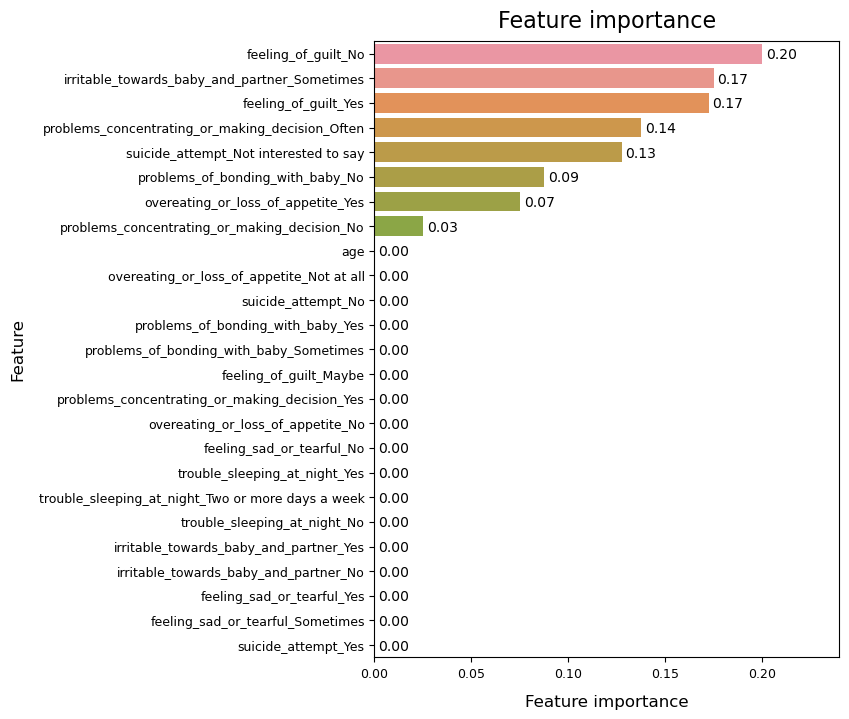

In [199]:
# Plot feature importance 
plot_feature_importance(ada_feature_importance, dist=0.01)

### 6.3.4. LightGBM

In [29]:
# Accuracy score: Evaluate model against training set 
lgb.score(X_train, y_train)

1.0

In [30]:
# Accuracy score: Evaluate model against testing set 
lgb.score(X_test, y_test)

0.9933554817275747

**&rarr; Model is not over-fitted**

**Cross-Validation**

In [31]:
%%time 

# Cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(lgb, X_train, y_train, cv=cv)

print(f'Scores:\n{scores}\n')
print(f'\033[1;3mLightGBM; Cross-validation mean accuracy score and standard deviation: {scores.mean():.3f} +/-{scores.std():.3f}\033[0m')

Scores:

[0.95867769 0.95041322 0.96666667 0.99166667 0.95833333 1.

 0.95833333 0.96666667 0.99166667 0.98333333 0.98347107 0.96694215

 0.975      0.96666667 0.98333333 0.94166667 1.         0.99166667

 0.975      0.95       0.95867769 0.99173554 0.98333333 0.975

 0.98333333 0.975      0.96666667 0.975      0.975      0.96666667]



LightGBM; Cross-validation mean accuracy score and standard deviation: 0.974 +/-0.015

CPU times: total: 25.8 s

Wall time: 1.68 s


**Learning Curves**

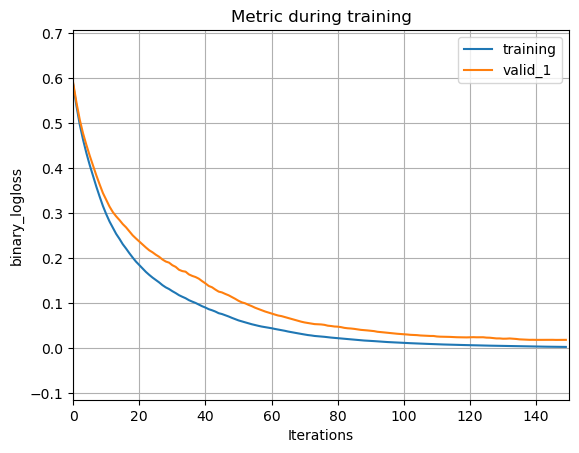

In [111]:
lightgbm.plot_metric(lgb);

**Hyperparameter Tuning**

In [113]:
# best_score_: Mean cross-validated score of the best_estimator
# best_params_: Parameter setting that gave the best results on the hold out data

print(lgb_rs.best_score_, lgb_rs.best_params_)

0.9692289073305671 {'subsample': 0.4, 'num_leaves': 10, 'max_depth': 6, 'learning_rate': 0.3}


In [126]:
# Accuracy score: Evaluate model against training set 
lgb_rs.score(X_train, y_train)

1.0

In [127]:
# Accuracy score: Evaluate model against testing set 
lgb_rs.score(X_test, y_test)

0.9933554817275747

**&rarr; Model is not over-fitted**

**Cross-Validation**

In [125]:
%%time 

# Cross-validation using best estimator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(lgb_rs.best_estimator_, X_train, y_train, cv=cv)

print(f'Scores:\n{scores}\n')
print(f'\033[1;3mLightGBM; Cross-validation mean accuracy score and standard deviation: {scores.mean():.3f} +/-{scores.std():.3f}\033[0m')

Scores:

[0.96694215 0.95041322 0.96666667 0.98333333 0.96666667 1.

 0.96666667 0.96666667 0.99166667 0.99166667 0.99173554 0.96694215

 0.99166667 0.96666667 0.98333333 0.94166667 1.         0.99166667

 0.98333333 0.95       0.95867769 0.99173554 0.98333333 0.98333333

 0.98333333 0.975      0.96666667 0.975      0.975      0.96666667]



LightGBM; Cross-validation mean accuracy score and standard deviation: 0.976 +/-0.015

CPU times: total: 13 s

Wall time: 855 ms


**&rarr; Model performance improvement by hyperparameter tuning was miniscule**

**Learning Curves**

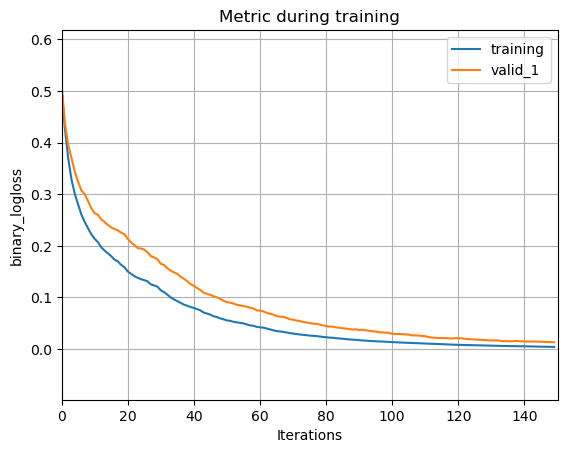

In [118]:
lightgbm.plot_metric(lgb);

In [119]:
# Retrieve performance metrics
results = lgb.evals_result_
results.keys()

dict_keys(['training', 'valid_1'])

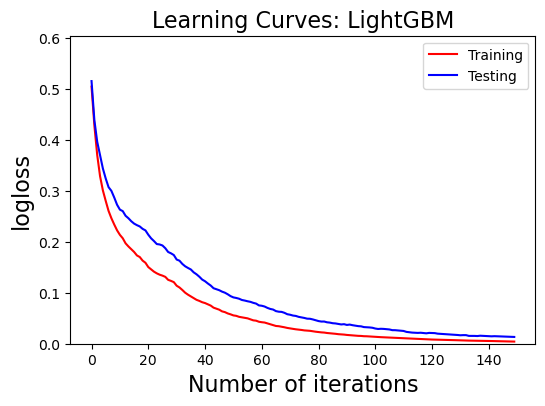

In [120]:
# Plot learning curves
learning_curve_lightgbm(results)

**Feature Importance**

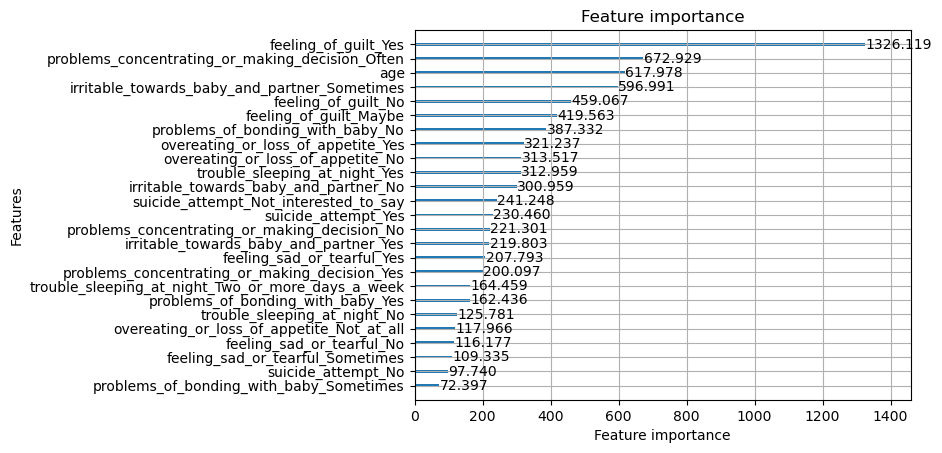

In [121]:
# Feature importance for untuned model
lgb = lightgbm.LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)

# Plot feature importance 
lightgbm.plot_importance(lgb, importance_type='gain');

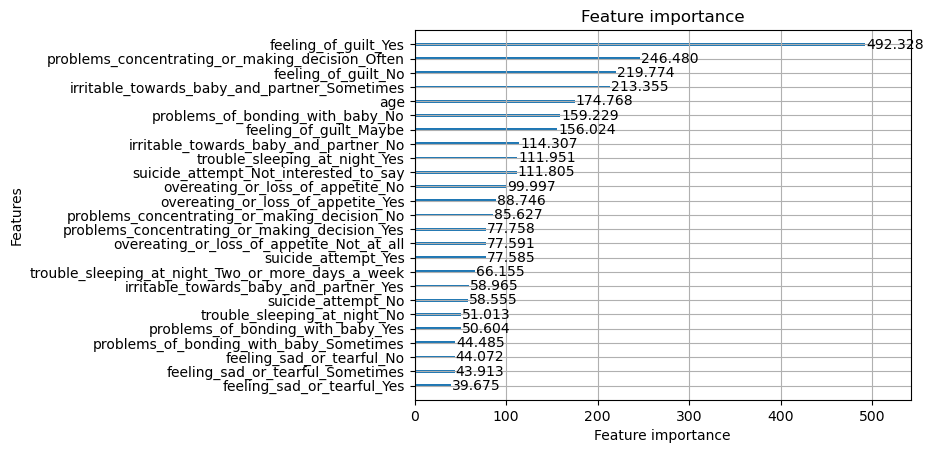

In [122]:
# Feature importance for tuned model
lgb = lightgbm.LGBMClassifier(learning_rate=0.3, max_depth=6, n_estimators=100, num_leaves=10, random_state=42, subsample=0.4, n_jobs=-1)
lgb.fit(X_train, y_train)

# Plot feature importance 
lightgbm.plot_importance(lgb, importance_type='gain');

In [123]:
# Retrieve feature importance 
imp = lgb.booster_.feature_importance(importance_type='gain')

# Compile feature importance in df
lgb_feature_importance = pd.DataFrame(zip(X_train.columns, imp), columns=['feature', 'feature_importance']).sort_values(by='feature_importance', ascending=False)
lgb_feature_importance

,feature,feature_importance
18,feeling_of_guilt_Yes,492.328087
11,problems_concentrating_or_making_decision_Often,246.479891
17,feeling_of_guilt_No,219.774154
5,irritable_towards_baby_and_partner_Sometimes,213.354543
0,age,174.768295
19,problems_of_bonding_with_baby_No,159.229106
16,feeling_of_guilt_Maybe,156.023912
4,irritable_towards_baby_and_partner_No,114.307270
9,trouble_sleeping_at_night_Yes,111.950821
23,suicide_attempt_Not interested to say,111.805190


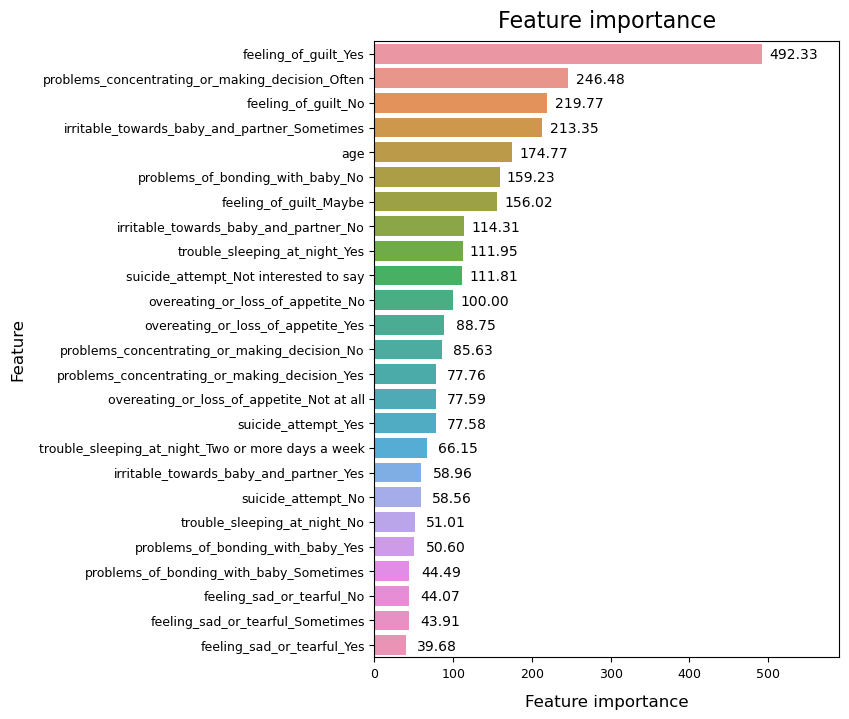

In [124]:
# Plot feature importance 
plot_feature_importance(lgb_feature_importance, dist=40)

**Tree**

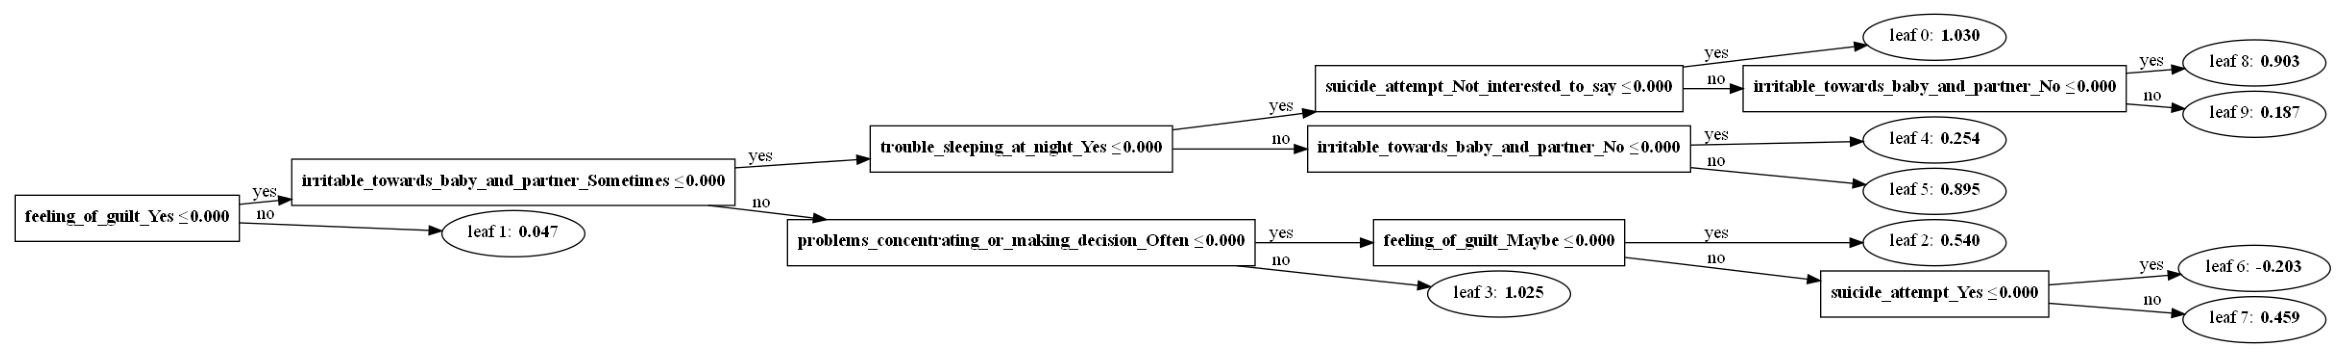

In [ ]:
# Plot tree
lightgbm.plot_tree(lgb,figsize=(30,40));

### 6.3.5. XGBoost

In [50]:
# Accuracy score: Evaluate model against training set 
xgb.score(X_train, y_train)

1.0

In [51]:
# Accuracy score: Evaluate model against testing set 
xgb.score(X_test, y_test)

0.9933554817275747

**&rarr; Model is not over-fitted**

**Cross-Validation**

In [52]:
%%time 

# Cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(xgb, X_train, y_train, cv=cv)

print(f'Scores:\n{scores}\n')
print(f'\033[1;3mXGBoost; Cross-validation mean accuracy score and standard deviation: {scores.mean():.3f} +/-{scores.std():.3f}\033[0m')

Scores:

[0.97520661 0.95041322 0.96666667 0.98333333 0.975      1.

 0.975      0.95833333 0.99166667 0.98333333 0.98347107 0.98347107

 0.975      0.96666667 0.99166667 0.93333333 1.         0.975

 0.975      0.95       0.95041322 0.98347107 0.98333333 0.98333333

 0.98333333 0.975      0.95833333 0.96666667 0.975      0.95      ]



XGBoost; Cross-validation mean accuracy score and standard deviation: 0.973 +/-0.016

CPU times: total: 40.7 s

Wall time: 2.61 s


**Learning Curves**

In [54]:
# Retrieve performance metrics
results = xgb.evals_result_
results.keys()

dict_keys(['validation_0', 'validation_1'])

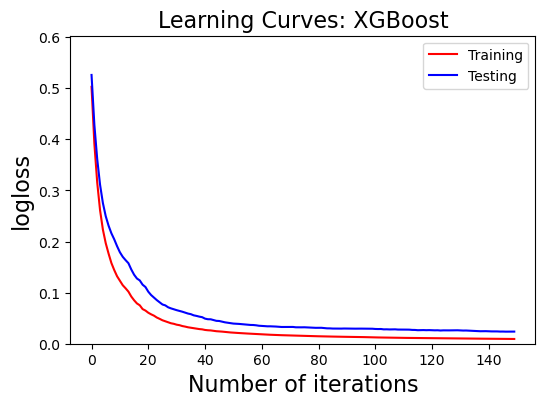

In [55]:
# Plot learning curves
learning_curve_xgboost(results)

**Hyperparameter Tuning**

In [133]:
# best_score_: Mean cross-validated score of the best_estimator
# best_params_: Parameter setting that gave the best results on the hold out data

print(xgb_rs.best_score_, xgb_rs.best_params_)

0.9675656984785614 {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.7}


In [135]:
# Accuracy score: Evaluate model against training set 
xgb_rs.score(X_train, y_train)

1.0

In [136]:
# Accuracy score: Evaluate model against testing set 
xgb_rs.score(X_test, y_test)

1.0

**&rarr; Model is not over-fitted**

**Cross-Validation**

In [137]:
%%time 

# Cross-validation using best estimator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(xgb_rs.best_estimator_, X_train, y_train, cv=cv)

print(f'Scores:\n{scores}\n')
print(f'\033[1;3mXGBoost; Cross-validation mean accuracy score and standard deviation: {scores.mean():.3f} +/-{scores.std():.3f}\033[0m')

Scores:

[0.97520661 0.95041322 0.98333333 0.98333333 0.95833333 0.99166667

 0.96666667 0.96666667 0.99166667 0.98333333 0.98347107 0.98347107

 0.975      0.95833333 0.98333333 0.94166667 1.         0.99166667

 0.96666667 0.95       0.95867769 0.98347107 0.975      0.98333333

 0.98333333 0.975      0.96666667 0.975      0.975      0.95833333]



XGBoost; Cross-validation mean accuracy score and standard deviation: 0.974 +/-0.014

CPU times: total: 42.5 s

Wall time: 2.73 s


**&rarr; Model performance improvement by hyperparameter tuning was miniscule**

**Learning Curves**

In [140]:
# Retrieve performance metrics
results = xgb.evals_result_
results.keys()

dict_keys(['validation_0', 'validation_1'])

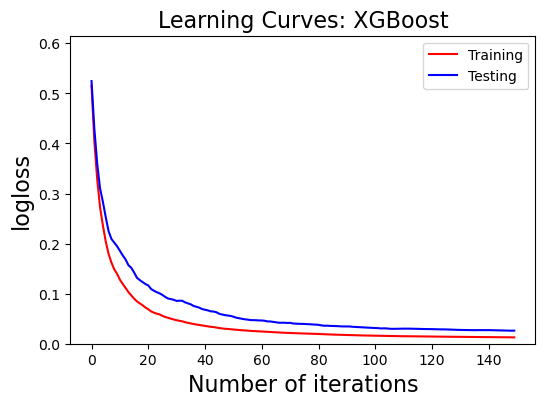

In [141]:
# Plot learning curves
learning_curve_xgboost(results)

**Feature Importance**

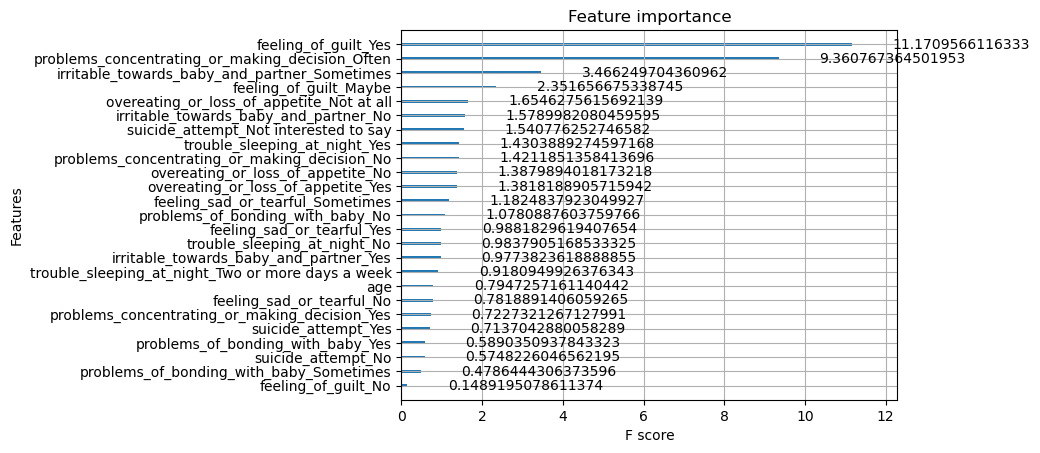

In [142]:
# Feature importance for untuned model
xgb = xgboost.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Plot feature importance 
xgboost.plot_importance(xgb, importance_type='gain');

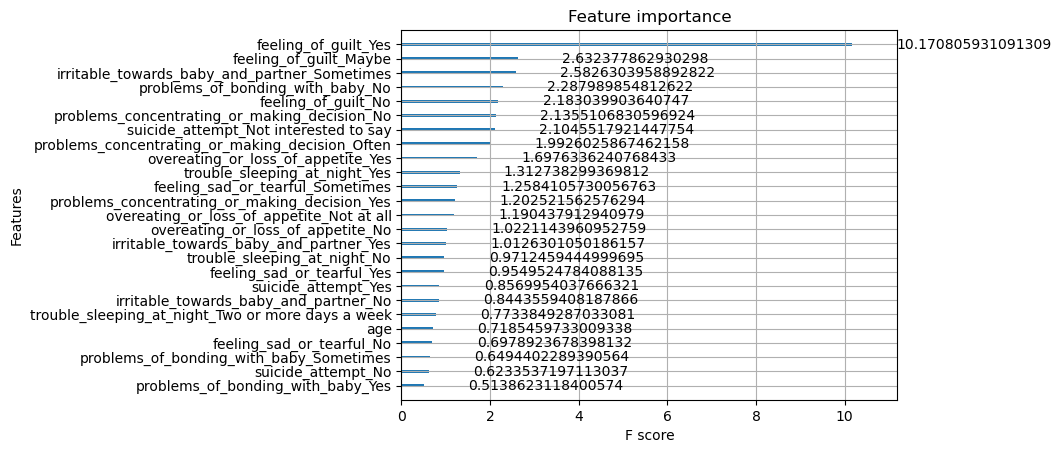

In [143]:
# Feature importance for tuned model
xgb = xgboost.XGBClassifier(n_estimators=100,
                            colsample_bytree=0.7,
                            subsample=0.8, 
                            learning_rate=0.3, 
                            max_depth=6, 
                            min_child_weight=1, 
                            n_jobs=-1,
                            random_state=42)

xgb.fit(X_train, y_train)

# Plot feature importance 
xgboost.plot_importance(xgb, importance_type='gain');

In [144]:
# Retrieve feature importance 
feature_imp = xgb.get_booster().get_score(importance_type="gain")
keys = feature_imp.keys()
values = feature_imp.values()

# Compile feature importance in df
xgb_feature_importance = pd.DataFrame(zip(keys, values), columns=['feature', 'feature_importance']).sort_values(by='feature_importance', ascending=False)
xgb_feature_importance

,feature,feature_importance
18,feeling_of_guilt_Yes,10.170806
16,feeling_of_guilt_Maybe,2.632378
5,irritable_towards_baby_and_partner_Sometimes,2.582630
19,problems_of_bonding_with_baby_No,2.287990
17,feeling_of_guilt_No,2.183040
10,problems_concentrating_or_making_decision_No,2.135511
23,suicide_attempt_Not interested to say,2.104552
11,problems_concentrating_or_making_decision_Often,1.992603
15,overeating_or_loss_of_appetite_Yes,1.697634
9,trouble_sleeping_at_night_Yes,1.312738


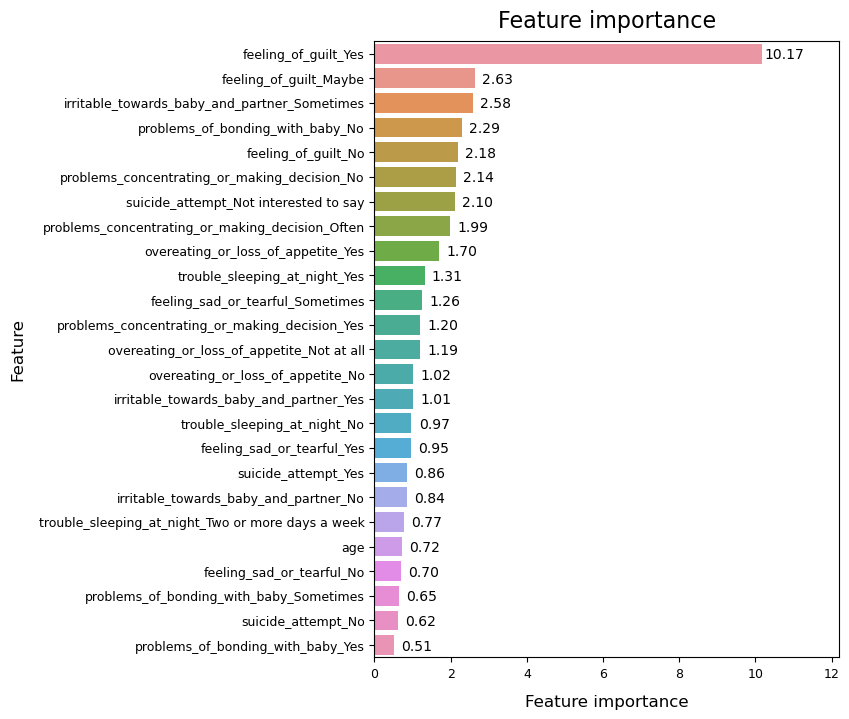

In [147]:
# Plot feature importance 
plot_feature_importance(xgb_feature_importance, dist=0.6)

**Tree**

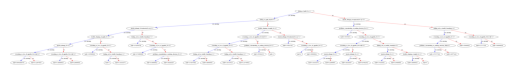

In [80]:
# Plot tree
xgboost.plot_tree(xgb,figsize=(30,40));

### 6.3.6. CatBoost

In [148]:
# Instantiate
cbc = catboost.CatBoostClassifier(verbose=0, random_state=42)

# Fit
cbc.fit(X_train, y_train)

In [149]:
# Accuracy score: Evaluate model against training set 
cbc.score(X_train, y_train)

1.0

In [150]:
# Accuracy score: Evaluate model against testing set 
cbc.score(X_test, y_test)

1.0

**&rarr; Model is not over-fitted**

**Cross-Validation**

In [151]:
%%time 

# Cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(cbc, X_train, y_train, cv=cv, n_jobs=-1)

print(f'Scores:\n{scores}\n')
print(f'\033[1;3mCatBoost; Cross-validation mean accuracy score and standard deviation: {scores.mean():.3f} +/-{scores.std():.3f}\033[0m')

Scores:

[0.97520661 0.95041322 0.96666667 0.98333333 0.96666667 1.

 0.96666667 0.96666667 1.         0.99166667 0.98347107 0.98347107

 0.98333333 0.96666667 0.98333333 0.94166667 1.         0.975

 0.98333333 0.95833333 0.97520661 0.98347107 0.98333333 0.98333333

 0.99166667 0.98333333 0.98333333 0.975      0.98333333 0.96666667]



CatBoost; Cross-validation mean accuracy score and standard deviation: 0.978 +/-0.013

CPU times: total: 156 ms

Wall time: 29.9 s


**Learning Curves**

In [152]:
# Define datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test, y_test)]

# Model parameters (untuned model)
cbc = catboost.CatBoostClassifier(random_state=42) # default iterations (= n_estimators): 500

# Fit model
cbc.fit(X_train, y_train, eval_set=evalset, use_best_model=True, verbose=0) # default loss function: Logloss

# Note! If parameter 'use_best_model' is set to True, the validation dataset is used to identify the optimal number of trees.
# Also, the 'use_best_model' parameter automatically defaults to True if a validation set is input (eval_set)

In [153]:
# Retrieve performance metrics
results = cbc.evals_result_
results.keys()

dict_keys(['learn', 'validation_0', 'validation_1'])

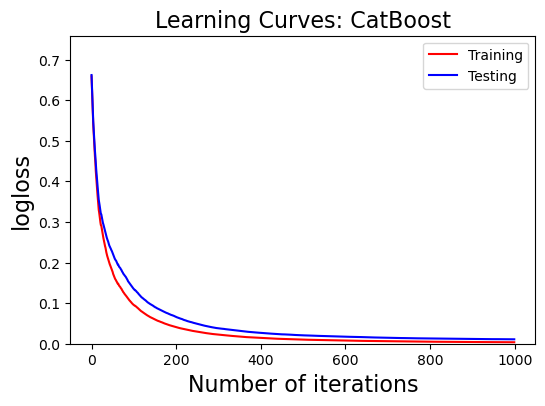

In [154]:
# Plot learning curves
learning_curve_catboost(results)

**Hyperparameter Tuning**

In [156]:
# best_score_: Mean cross-validated score of the best_estimator
# best_params_: Parameter setting that gave the best results on the hold out data

print(cbc_rs.best_score_, cbc_rs.best_params_)

0.9733921161825727 {'max_depth': 7, 'learning_rate': 0.03, 'iterations': 500}


In [157]:
# best_estimator_: Estimator which gave highest score on the hold out data
cbc_rs.best_estimator_

In [158]:
# Accuracy score: Evaluate model against training set 
cbc_rs.score(X_train, y_train)

1.0

In [159]:
# Accuracy score: Evaluate model against testing set 
cbc_rs.score(X_test, y_test)

1.0

**&rarr; Model is not over-fitted**

**Cross-Validation**

In [160]:
%%time 

# Cross-validation using best estimator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(cbc_rs.best_estimator_, X_train, y_train, cv=cv, n_jobs=-1)

print(f'Scores:\n{scores}\n')
print(f'\033[1;3mCatBoost; Cross-validation mean accuracy score and standard deviation: {scores.mean():.3f} +/-{scores.std():.3f}\033[0m')

Scores:

[0.98347107 0.94214876 0.96666667 0.98333333 0.96666667 1.

 0.96666667 0.98333333 1.         1.         0.98347107 0.98347107

 0.98333333 0.975      0.98333333 0.94166667 1.         0.98333333

 0.98333333 0.95833333 0.97520661 0.98347107 0.98333333 0.98333333

 0.99166667 0.975      0.98333333 0.96666667 0.98333333 0.975     ]



CatBoost; Cross-validation mean accuracy score and standard deviation: 0.979 +/-0.014

CPU times: total: 78.1 ms

Wall time: 14.7 s


**&rarr; Model performance improvement by hyperparameter tuning was miniscule**

**Learning Curves**

In [161]:
# Define datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test, y_test)]

# Model parameters (tuned model)
cbc = catboost.CatBoostClassifier(iterations=500, learning_rate=0.03, max_depth=7, random_state=42, loss_function='Logloss')

# Fit model
cbc.fit(X_train, y_train, eval_set=evalset, verbose=0)

In [162]:
# Retrieve performance metrics
results = cbc.evals_result_
results.keys()

dict_keys(['learn', 'validation_0', 'validation_1'])

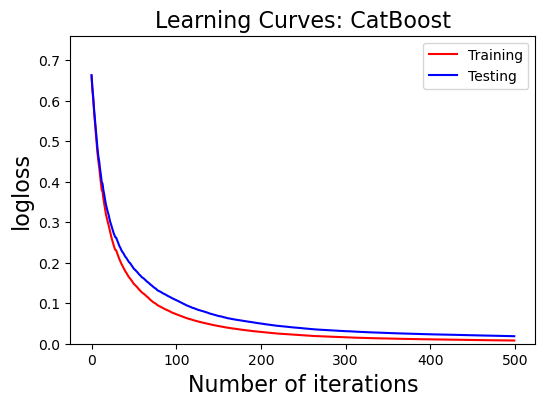

In [163]:
# Plot learning curves
learning_curve_catboost(results)

**Feature Importance**

In [164]:
cbc = catboost.CatBoostClassifier(iterations=500, learning_rate=0.03, max_depth=7, random_state=42, loss_function='Logloss')
cbc.fit(X_train, y_train, verbose=0)

# Compile feature importance
cbc_feature_importance = pd.DataFrame(zip(X_train.columns, cbc.feature_importances_), columns=['feature', 'feature_importance']).sort_values(by='feature_importance', ascending=False)
cbc_feature_importance

,feature,feature_importance
18,feeling_of_guilt_Yes,11.613357
17,feeling_of_guilt_No,7.444379
0,age,6.705319
5,irritable_towards_baby_and_partner_Sometimes,5.729612
10,problems_concentrating_or_making_decision_No,5.584736
19,problems_of_bonding_with_baby_No,4.924223
9,trouble_sleeping_at_night_Yes,4.856633
15,overeating_or_loss_of_appetite_Yes,4.467732
23,suicide_attempt_Not interested to say,3.389204
4,irritable_towards_baby_and_partner_No,3.380810


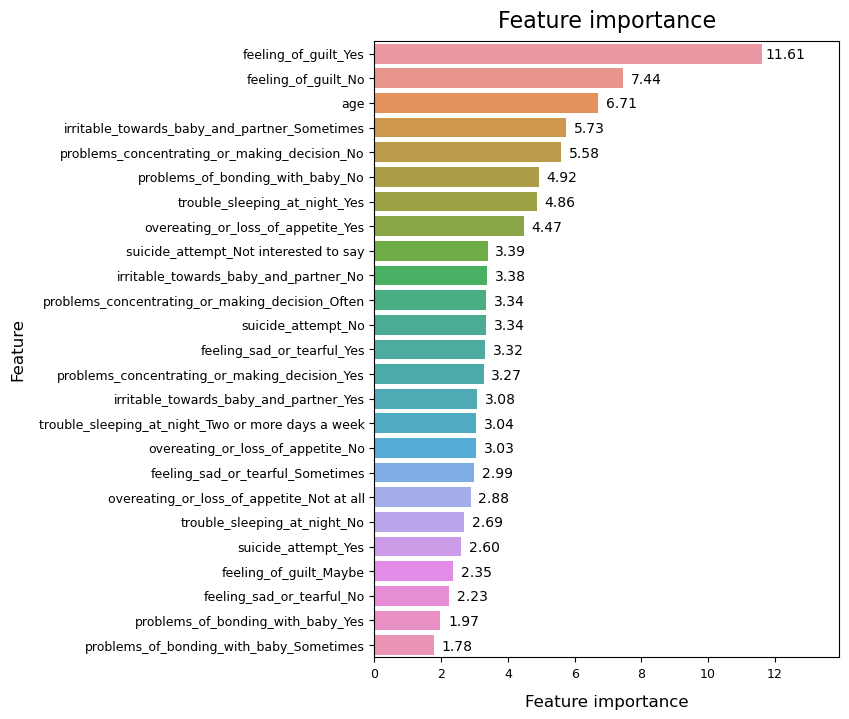

In [165]:
# Plot feature importance
plot_feature_importance(cbc_feature_importance, dist=0.7)

### 6.3.7. Model evaluation

#### Evaluation of tree-based models on training data



Decision Tree



Summary Report

Accuracy:  0.90 [TP / N] Proportion of predicted labels that match true labels

Precision: 0.90 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    0.94 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  0.92 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   0.88

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




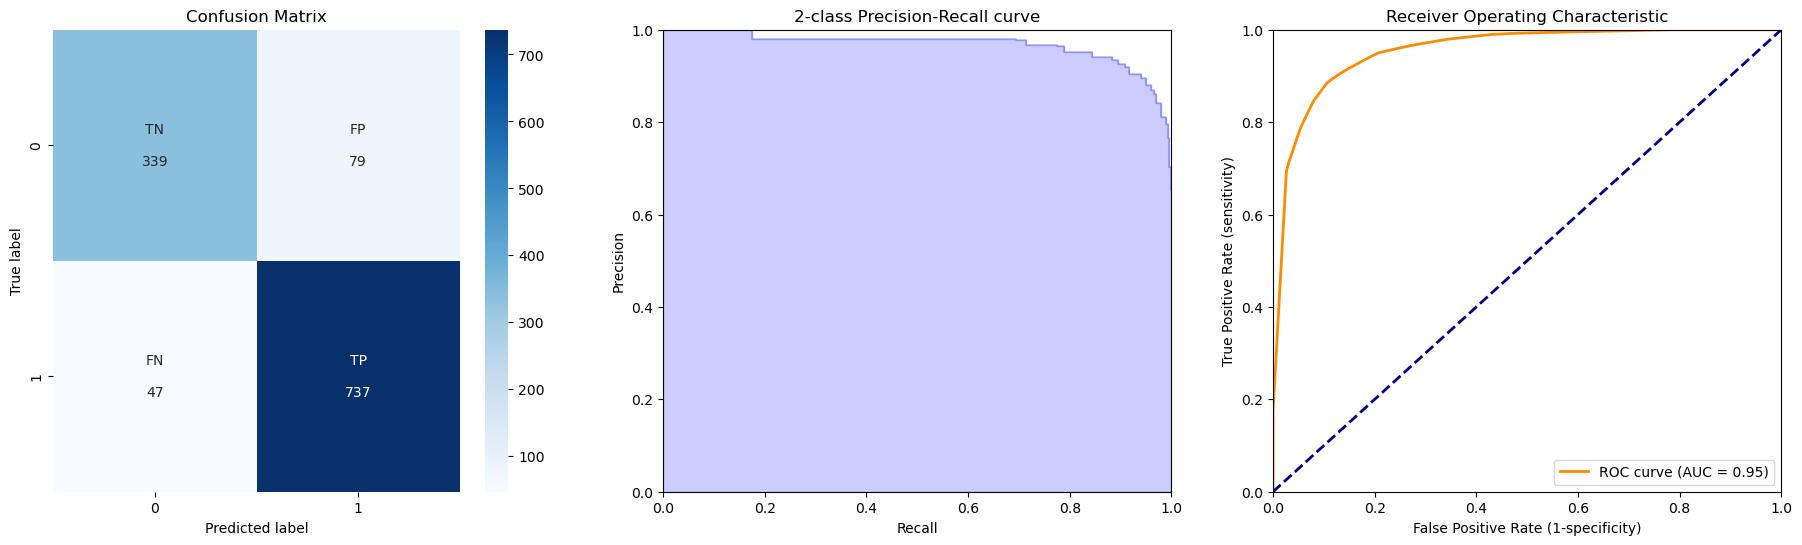



Random Forest



Summary Report

Accuracy:  0.91 [TP / N] Proportion of predicted labels that match true labels

Precision: 0.92 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    0.94 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  0.93 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   0.90

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




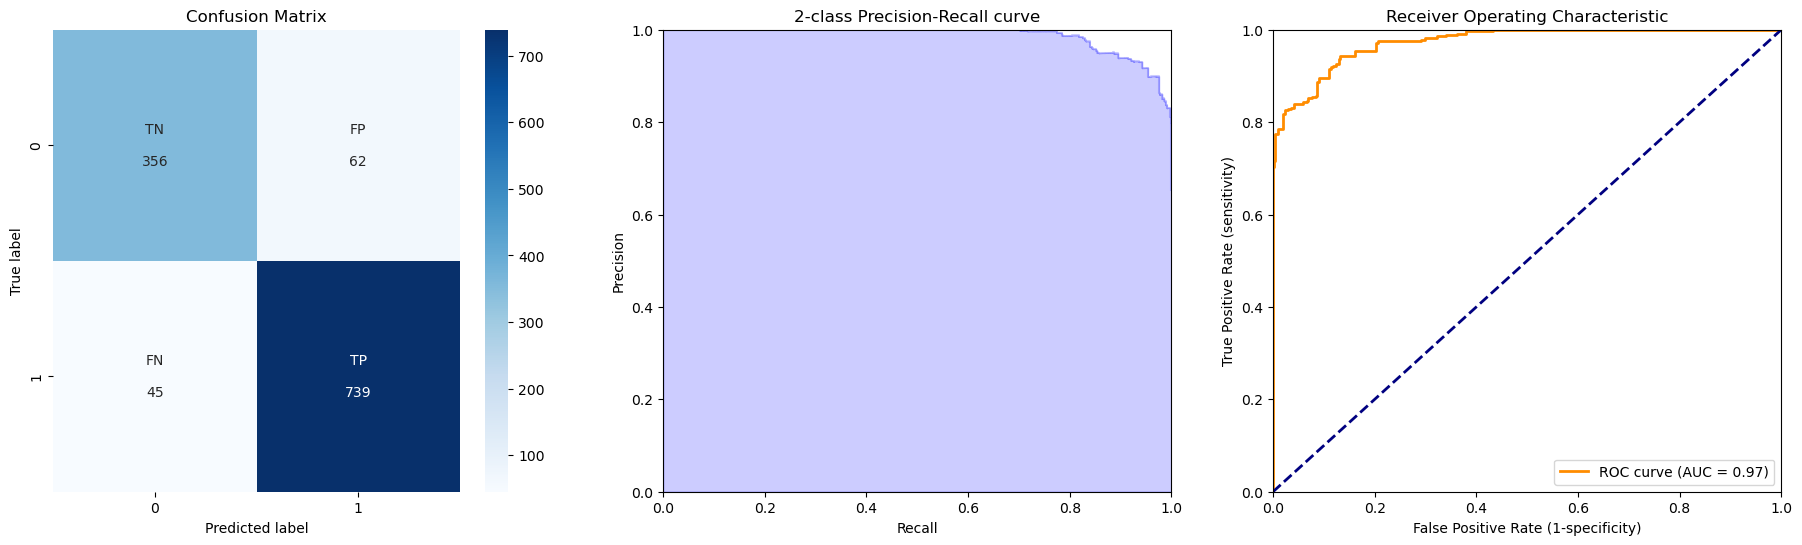



AdaBoost



Summary Report

Accuracy:  0.85 [TP / N] Proportion of predicted labels that match true labels

Precision: 0.86 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    0.93 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  0.89 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   0.82

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




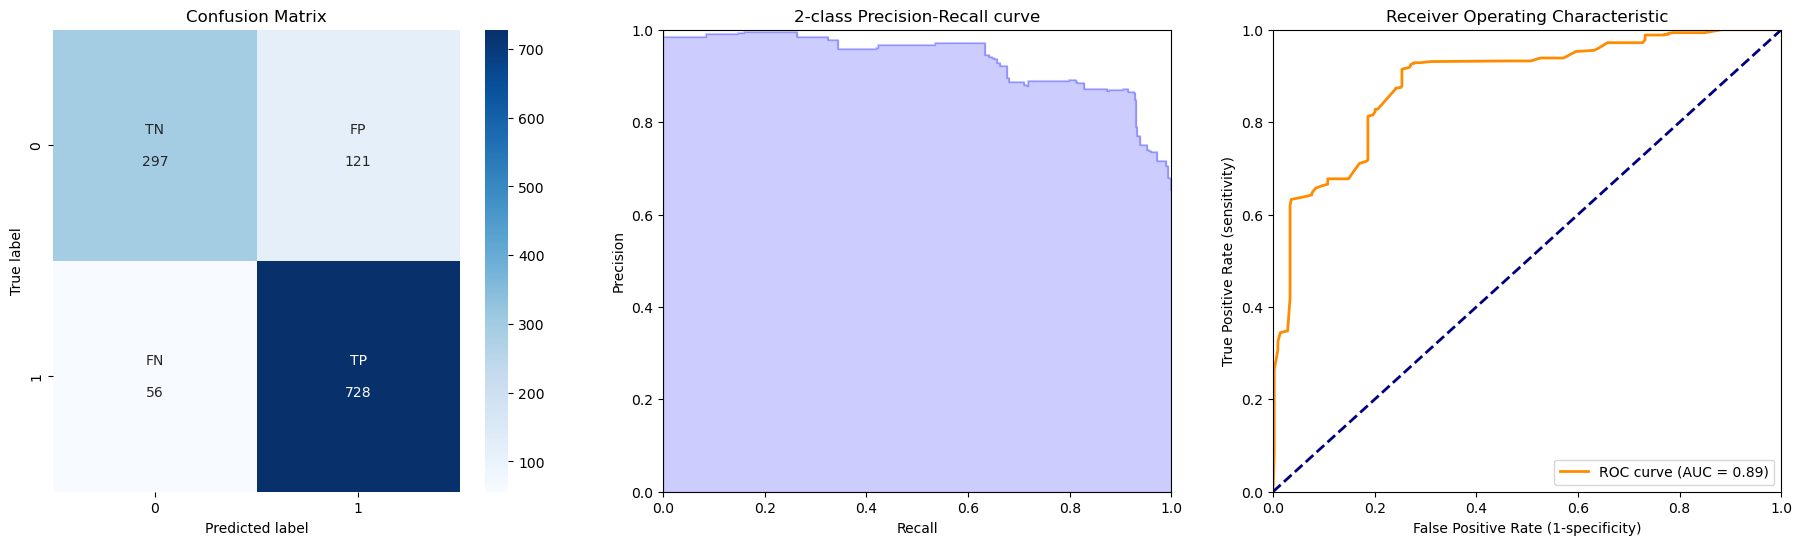



LightGBM



Summary Report

Accuracy:  1.00 [TP / N] Proportion of predicted labels that match true labels

Precision: 1.00 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    1.00 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  1.00 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   1.00

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




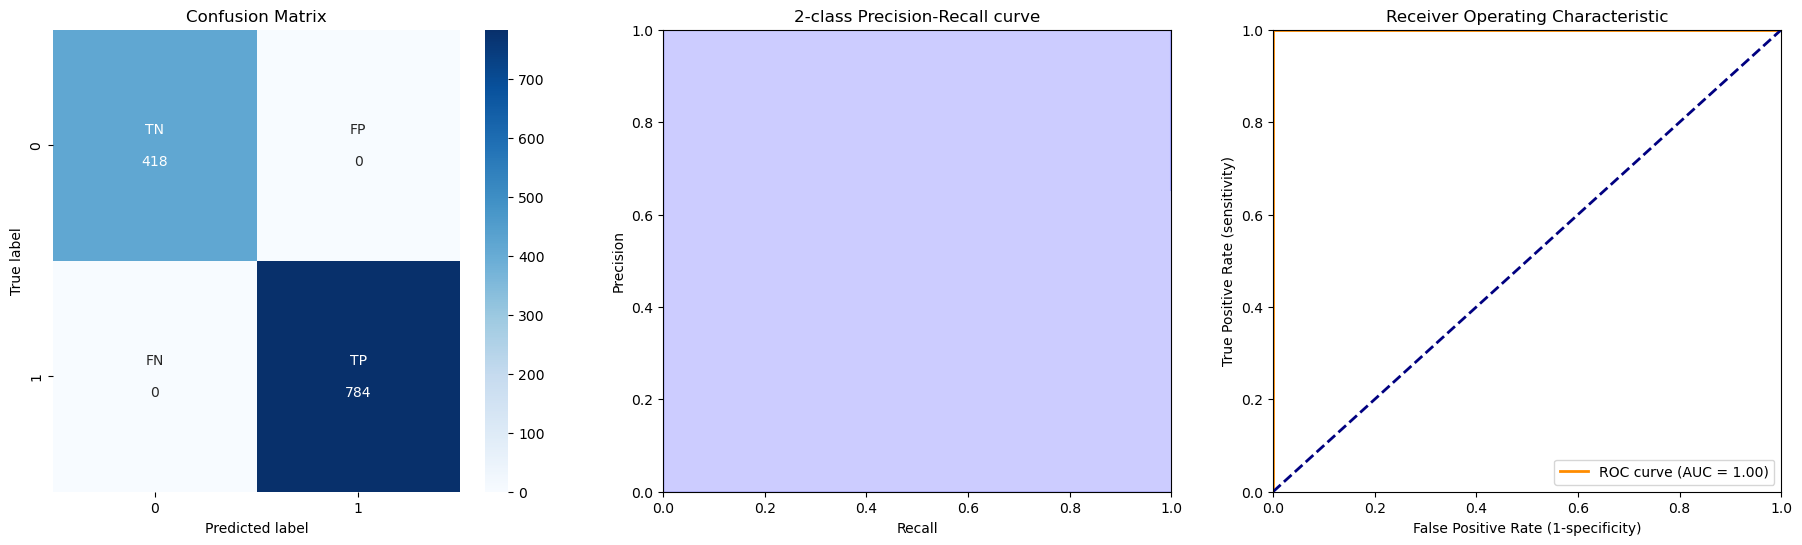



XGBoost



Summary Report

Accuracy:  1.00 [TP / N] Proportion of predicted labels that match true labels

Precision: 1.00 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    1.00 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  1.00 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   1.00

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




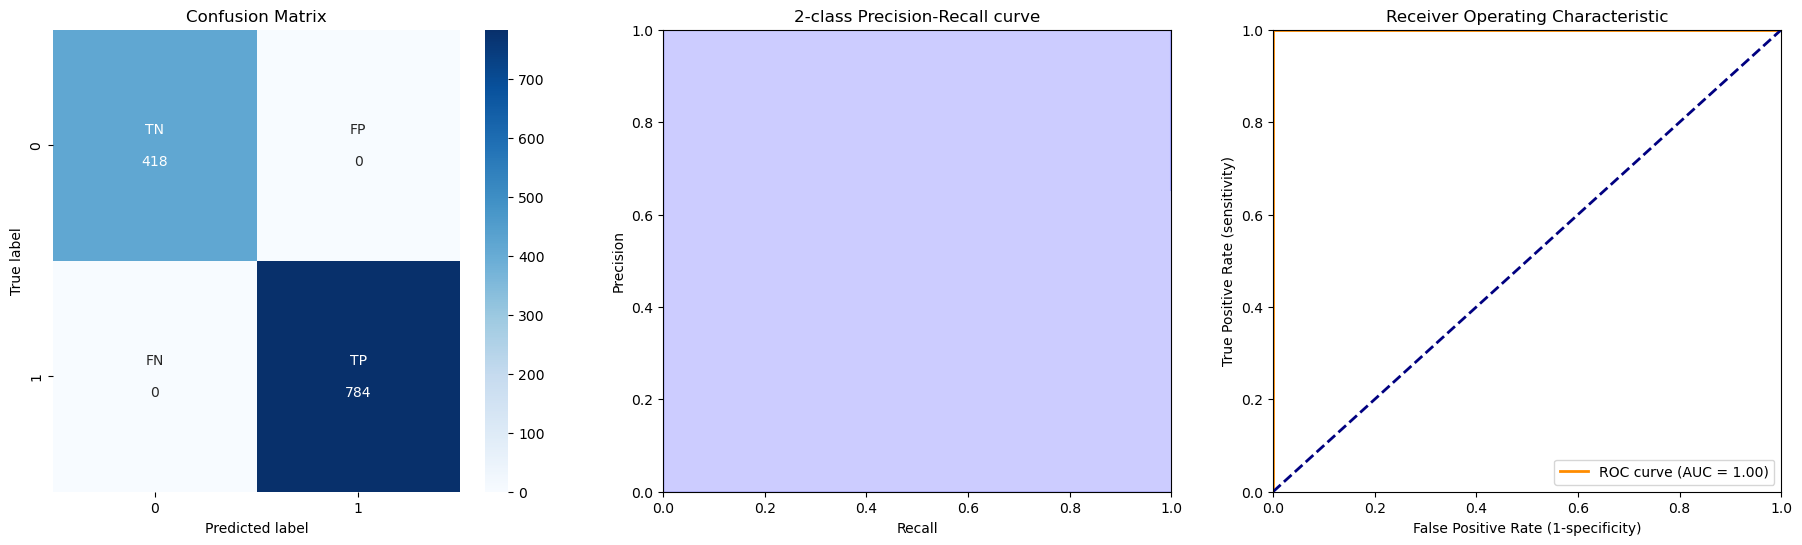



CatBoost



Summary Report

Accuracy:  1.00 [TP / N] Proportion of predicted labels that match true labels

Precision: 1.00 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    1.00 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  1.00 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   1.00

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




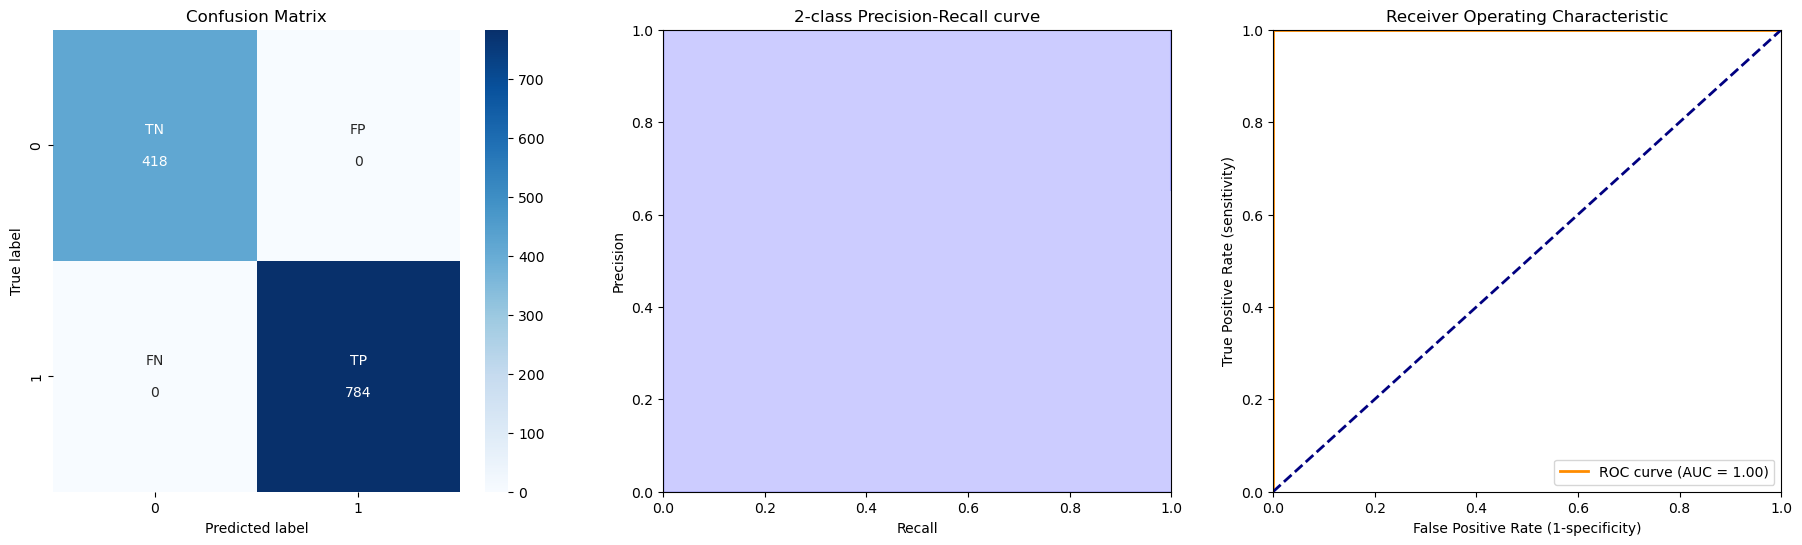

,Model,Set,Accuracy,Precision,Recall,F1-score,ROC_AUC
2,AdaBoost,Train,0.853,0.857,0.929,0.892,0.820
5,CatBoost,Train,1.000,1.000,1.000,1.000,1.000
0,Decision Tree,Train,0.895,0.903,0.940,0.921,0.876
3,LightGBM,Train,1.000,1.000,1.000,1.000,1.000
1,Random Forest,Train,0.911,0.923,0.943,0.932,0.897
4,XGBoost,Train,1.000,1.000,1.000,1.000,1.000


In [200]:
## Print summary report including all plots and combine performance indicators of all models in a dataframe

# Create empty df with column headers
column_names = ['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC_AUC']
results_train = pd.DataFrame(columns=column_names)

# Model names
# models = ['Decision Tree_train', 'Random Forest_train', 'Bagging_train', 'AdaBoost_train', 'XGBoost_train', 'CatBoost_train']
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'LightGBM', 'XGBoost', 'CatBoost']

# Iterate through models
for i, m in enumerate([dtc_gs.best_estimator_, rfc_gs.best_estimator_, ada_gs.best_estimator_, lgb_rs.best_estimator_, xgb_rs.best_estimator_, cbc_rs.best_estimator_]):
    print(f'\n\033[1m{Fore.BLUE}{models[i]}{Style.RESET_ALL}\033[0m\n')
    
    # Summary report
    accuracy_, precision_, recall_, f1_, roc_auc_ = summary_report_tree(m, X_train, y_train)
    
    # Round values
    list = [accuracy_, precision_, recall_, f1_, roc_auc_]
    accuracy_, precision_, recall_, f1_, roc_auc_ = [round(x, 3) for x in list]
    
    # Add results to df
    results_train.loc[i] = {'Model': models[i], 'Set': 'Train', 'Accuracy': accuracy_, 'Precision': precision_,
                            'Recall': recall_, 'F1-score': f1_, 'ROC_AUC': roc_auc_}    

# Print dataframe with performance indicators for all models
print('\n')
results_train.sort_values(by='Model')

#### Evaluation of tree-based models on testing data



Decision Tree



Summary Report

Accuracy:  0.88 [TP / N] Proportion of predicted labels that match true labels

Precision: 0.90 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    0.91 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  0.91 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   0.86

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




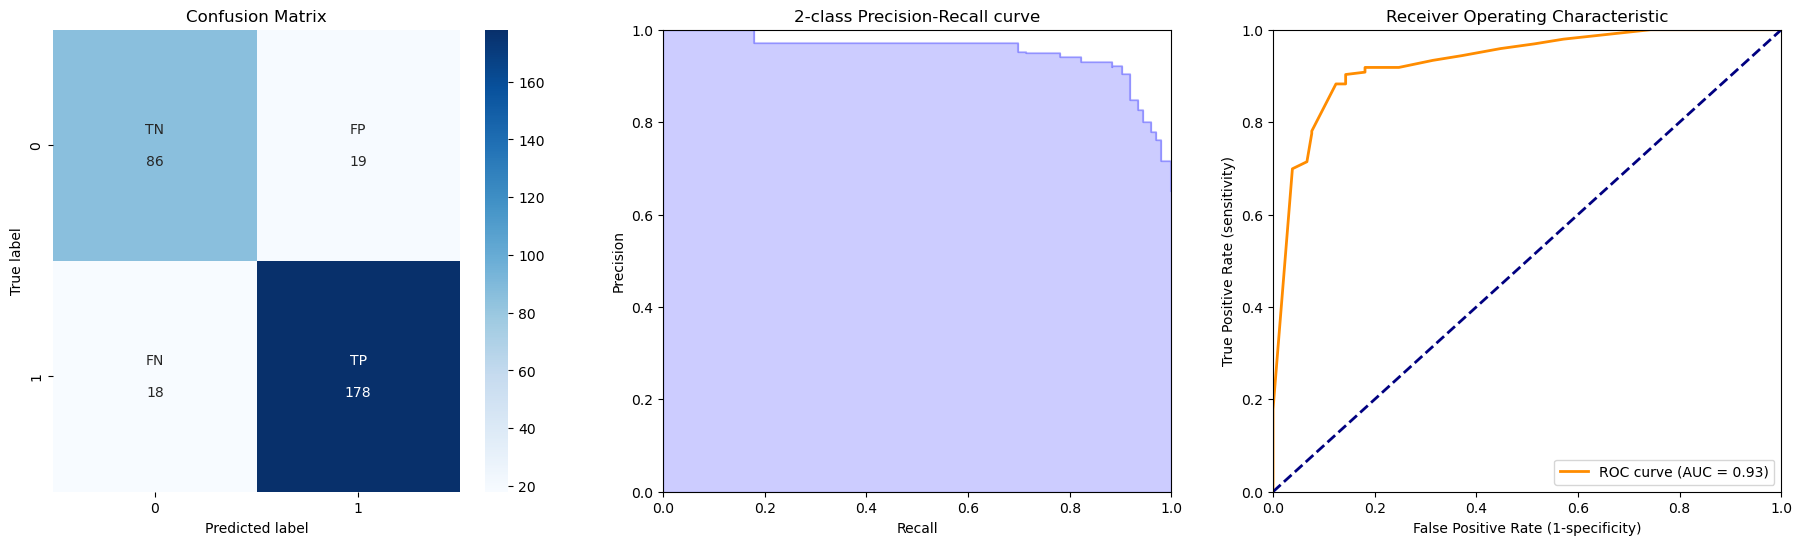



Random Forest



Summary Report

Accuracy:  0.87 [TP / N] Proportion of predicted labels that match true labels

Precision: 0.89 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    0.91 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  0.90 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   0.85

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




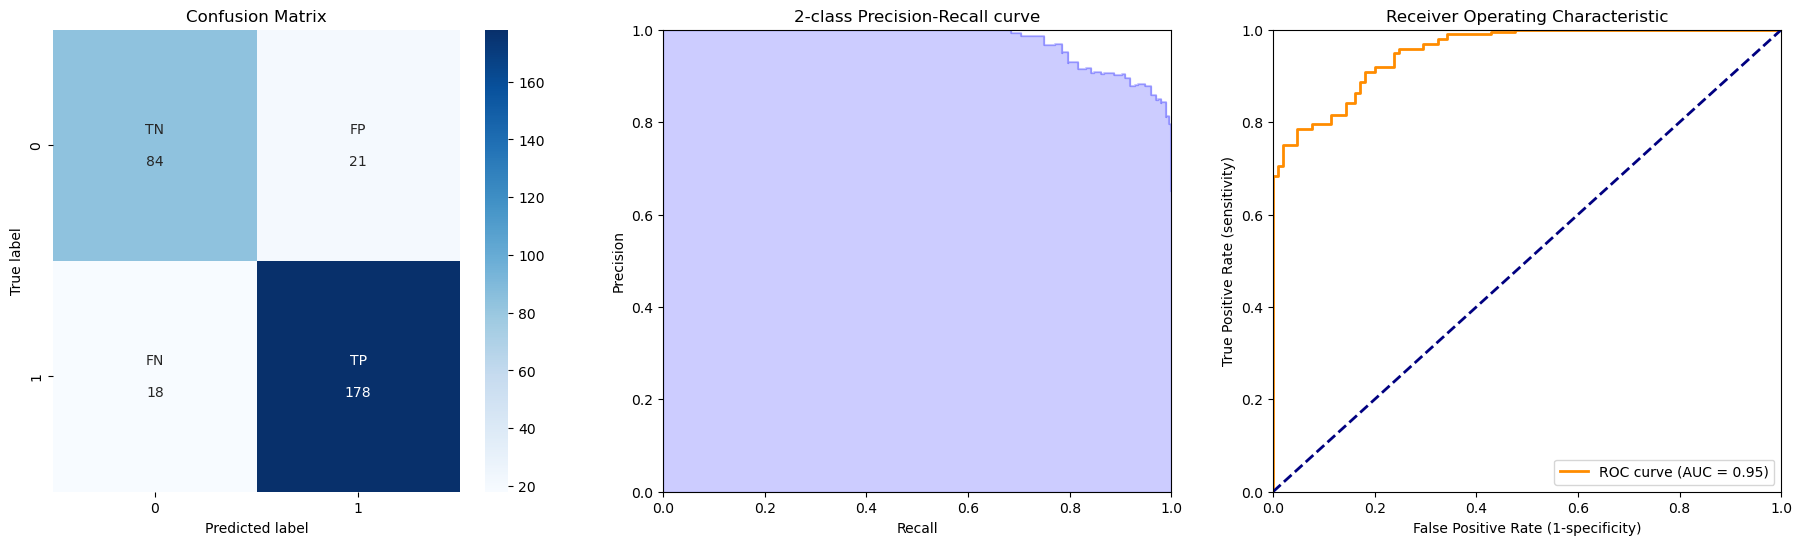



AdaBoost



Summary Report

Accuracy:  0.84 [TP / N] Proportion of predicted labels that match true labels

Precision: 0.85 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    0.92 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  0.88 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   0.81

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




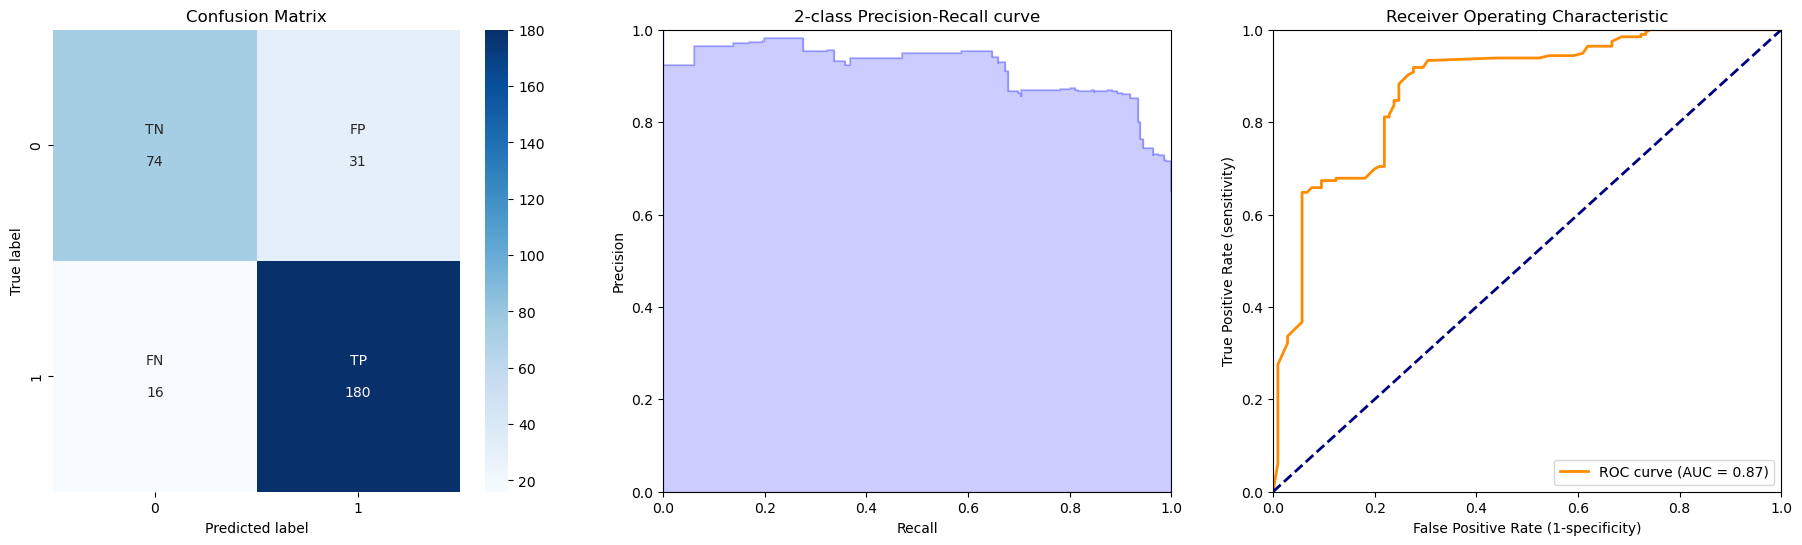



LightGBM



Summary Report

Accuracy:  0.99 [TP / N] Proportion of predicted labels that match true labels

Precision: 1.00 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    0.99 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  0.99 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   0.99

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




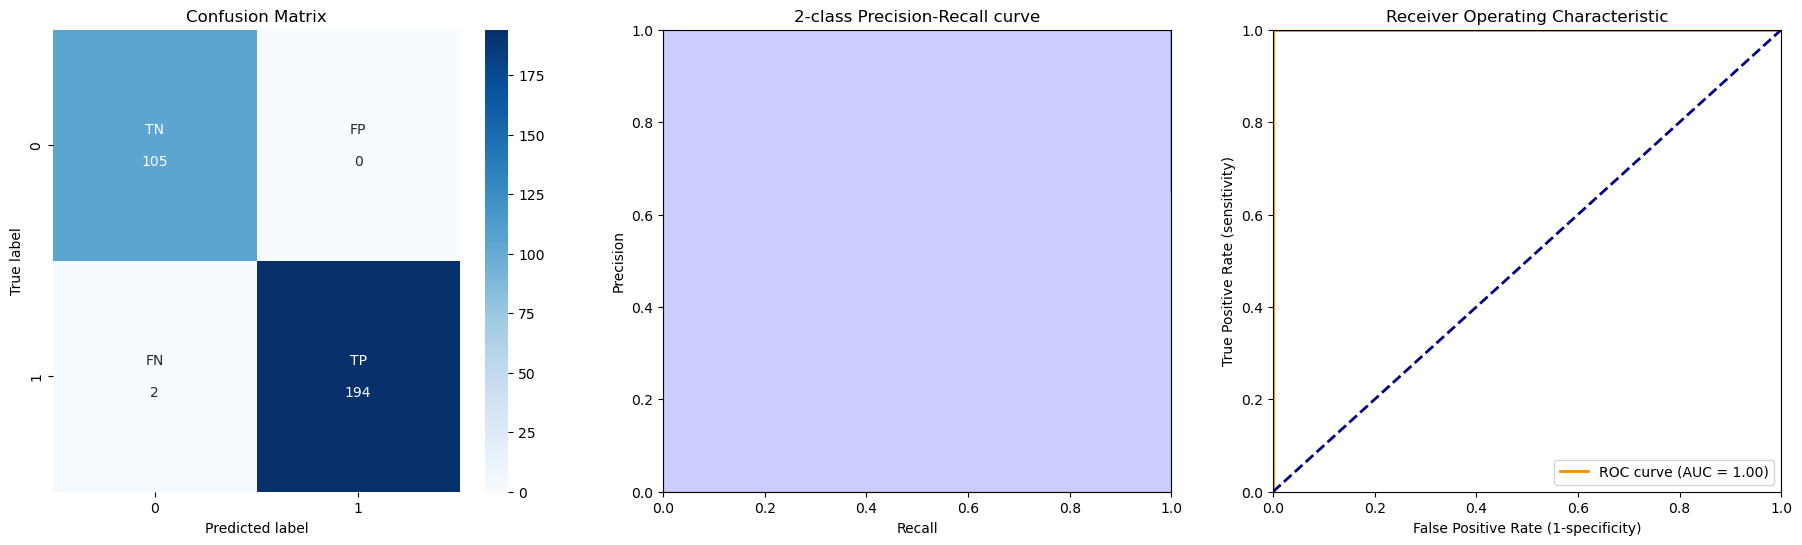



XGBoost



Summary Report

Accuracy:  1.00 [TP / N] Proportion of predicted labels that match true labels

Precision: 1.00 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    1.00 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  1.00 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   1.00

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




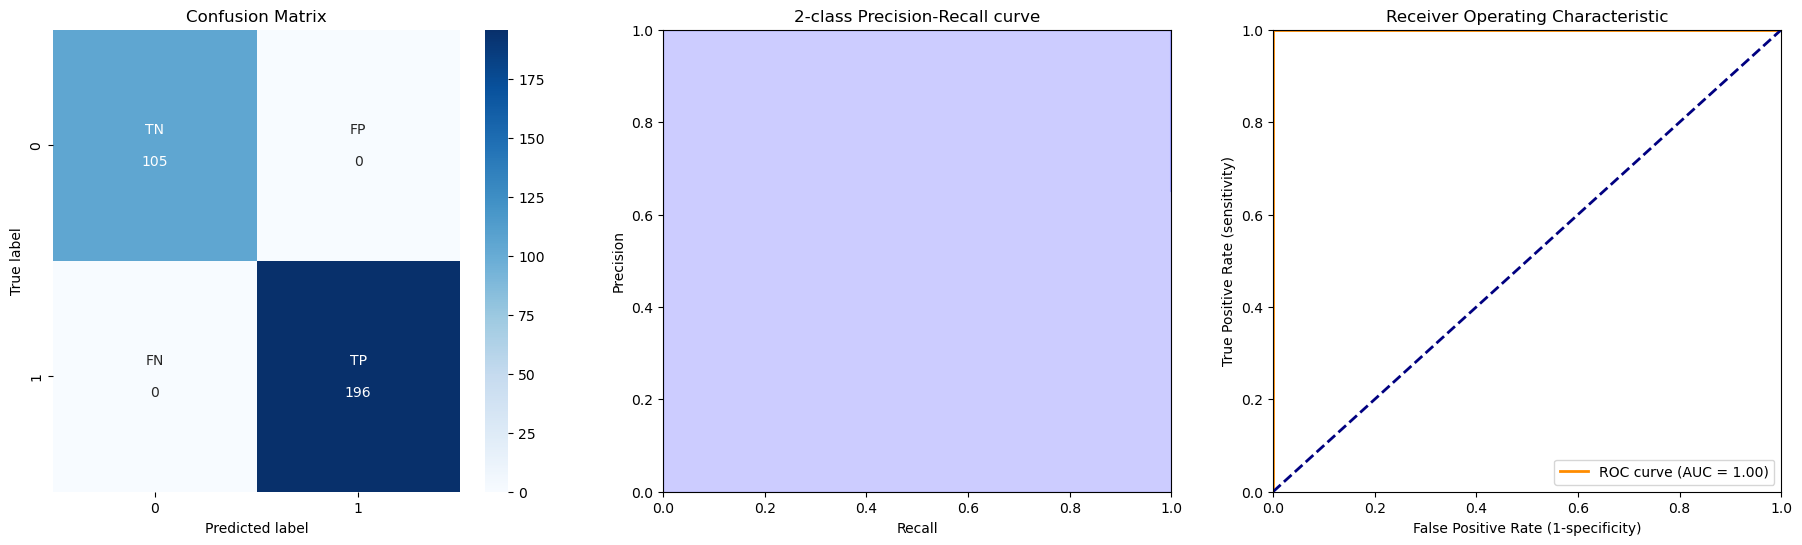



CatBoost



Summary Report

Accuracy:  1.00 [TP / N] Proportion of predicted labels that match true labels

Precision: 1.00 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    1.00 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  1.00 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   1.00

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




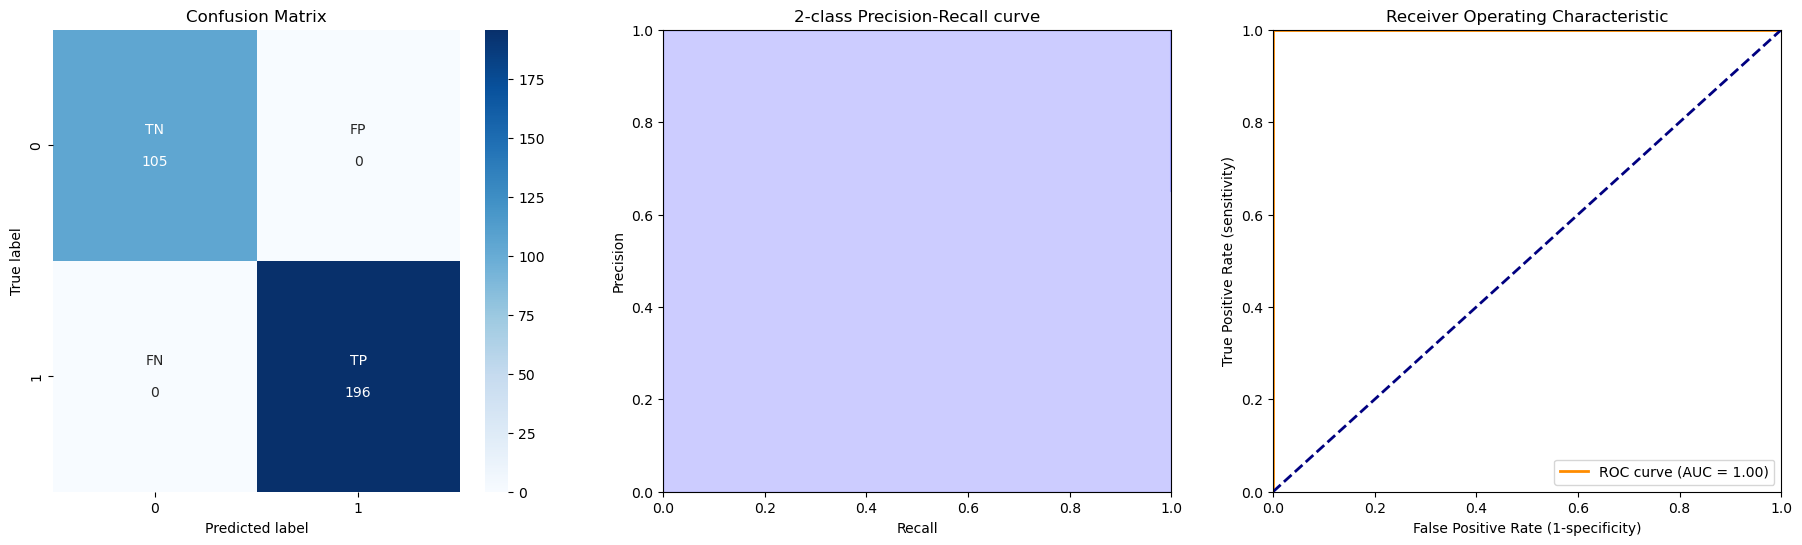

,Model,Set,Accuracy,Precision,Recall,F1-score,ROC_AUC
2,AdaBoost,Train,0.853,0.857,0.929,0.892,0.820
8,AdaBoost,Test,0.844,0.853,0.918,0.885,0.812
5,CatBoost,Train,1.000,1.000,1.000,1.000,1.000
11,CatBoost,Test,1.000,1.000,1.000,1.000,1.000
0,Decision Tree,Train,0.895,0.903,0.940,0.921,0.876
6,Decision Tree,Test,0.877,0.904,0.908,0.906,0.864
3,LightGBM,Train,1.000,1.000,1.000,1.000,1.000
9,LightGBM,Test,0.993,1.000,0.990,0.995,0.995
1,Random Forest,Train,0.911,0.923,0.943,0.932,0.897
7,Random Forest,Test,0.870,0.894,0.908,0.901,0.854


In [201]:
## Print summary report including all plots, combine performance indicators of all models and append to dataframe

results = results_train.copy()

# Model names
# models = ['Decision Tree_test', 'Random Forest_test', 'Bagging_test', 'AdaBoost_test', 'XGBoost_test', 'CatBoost_test']
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'LightGBM', 'XGBoost', 'CatBoost']

# Iterate through models
for i, m in enumerate([dtc_gs.best_estimator_, rfc_gs.best_estimator_, ada_gs.best_estimator_, lgb_rs.best_estimator_, xgb_rs.best_estimator_, cbc_rs.best_estimator_]):
    print(f'\n\033[1m{Fore.BLUE}{models[i]}{Style.RESET_ALL}\033[0m\n')
    
    # Summary report
    accuracy_, precision_, recall_, f1_, roc_auc_ = summary_report_tree(m, X_test, y_test)
    
    # Round values
    list = [accuracy_, precision_, recall_, f1_, roc_auc_]
    accuracy_, precision_, recall_, f1_, roc_auc_ = [round(x, 3) for x in list]
    
    # Add results to df
    results.loc[i+len(results_train)] = {'Model': models[i], 'Set': 'Test', 'Accuracy': accuracy_, 'Precision': precision_,
                                         'Recall': recall_, 'F1-score': f1_, 'ROC_AUC': roc_auc_}    

# Copy results
results_tree_models = results.copy()

# Print dataframe with performance indicators for all models
print('\n')
results.sort_values(by=['Model', 'Set'], ascending = [True, False])

**Documentation**
* CatBoost and XGBoost are the best performers, closely followed by LightGBM 
* Decision Tree and Random Forest are midfield
* AdaBoost is the worst performer

## 6.4. Neural network-based models

In [ ]:
X_train.head()

,age,feeling_sad_or_tearful_No,feeling_sad_or_tearful_Sometimes,feeling_sad_or_tearful_Yes,irritable_towards_baby_and_partner_No,irritable_towards_baby_and_partner_Sometimes,irritable_towards_baby_and_partner_Yes,trouble_sleeping_at_night_No,trouble_sleeping_at_night_Two or more days a week,trouble_sleeping_at_night_Yes,...,overeating_or_loss_of_appetite_Yes,feeling_of_guilt_Maybe,feeling_of_guilt_No,feeling_of_guilt_Yes,problems_of_bonding_with_baby_No,problems_of_bonding_with_baby_Sometimes,problems_of_bonding_with_baby_Yes,suicide_attempt_No,suicide_attempt_Not interested to say,suicide_attempt_Yes
133,4,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
35,2,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
984,3,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
110,3,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1465,2,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0


In [ ]:
y_train

array([0, 1, 1, ..., 0, 0, 1])

### 6.4.1. Fully connected model

**Model architecture**

In [234]:
# Define model
clear_session()

n_cols = X_train.shape[1]

model = Sequential()
model.add(Dense(40, input_shape = (n_cols,), activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

**Compile model**

In [235]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 40)                1040      

                                                                 

 dense_1 (Dense)             (None, 40)                1640      

                                                                 

 dropout (Dropout)           (None, 40)                0         

                                                                 

 dense_2 (Dense)             (None, 1)                 41        

                                                                 


Total params: 2,721

Trainable params: 2,721

Non-trainable params: 0

_________________________________________________________________


**Fit model**

In [236]:
%%time

# Fit model
epochs = 50
batch_size = 10

history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=0)

CPU times: total: 18.2 s

Wall time: 10.4 s


In [218]:
# List data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Learning curves**

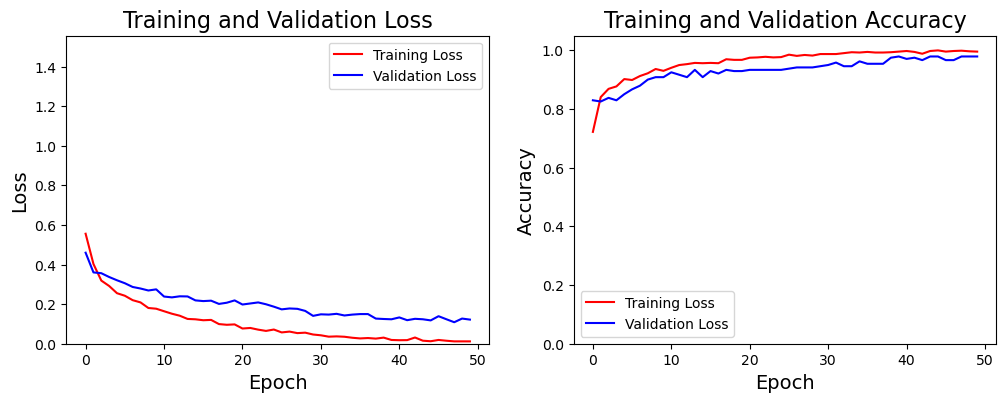

In [219]:
learning_curve_nn(history)

**Model evaluation**

In [237]:
# Evaluate model with test data
scores = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {scores[0]:.4f}') 
print(f'Test accuracy: {scores[1]:.4f}')

Test loss: 0.0852

Test accuracy: 0.9734


In [238]:
# Alternatively
for i, m in enumerate(model.metrics_names):
    print(f"{m}: {scores[i]:.4f}")

loss: 0.0852

accuracy: 0.9734


**Model prediction**

In [239]:
test_size = 5

# Use model.predict() to extract class probabilities
pred_prob = model.predict(X_test[:test_size]) 
pred_prob

1/1 [==============================] - 0s 61ms/step


array([[1.2823368e-02],
       [6.5951626e-04],
       [1.9036273e-02],
       [9.9993664e-01],
       [9.9999064e-01]], dtype=float32)

In [240]:
# Set a probability threshold of 50% for classification, i.e. >0.5 is True
# Note! The '*1' converts the Boolean array into an array containing 0 or 1
pred = (pred_prob > 0.5)*1
pred.flatten()

array([0, 0, 0, 1, 1])

In [241]:
# Inverse label encoding
pred_ = le.inverse_transform(pred.flatten())
pred_

array(['No', 'No', 'No', 'Yes', 'Yes'], dtype=object)

In [242]:
# Prediction in a single line of code
pred_ = le.inverse_transform(((model.predict(X_test[:test_size])>0.5)*1).flatten())
pred_

1/1 [==============================] - 0s 22ms/step


array(['No', 'No', 'No', 'Yes', 'Yes'], dtype=object)

In [243]:
y_test[:test_size]

array([0, 0, 0, 1, 1])

In [244]:
# Retrieve true values from y_test
true_y = le.inverse_transform(y_test[:test_size])
true_y

array(['No', 'No', 'No', 'Yes', 'Yes'], dtype=object)

In [245]:
# Compare prediction and true values
for i,j in zip(pred_, true_y):
    print("Predicted: {}, True: {}".format(i, j))

Predicted: No, True: No

Predicted: No, True: No

Predicted: No, True: No

Predicted: Yes, True: Yes

Predicted: Yes, True: Yes


In [246]:
# Compile results in df
pd.DataFrame(zip(pred_, true_y), columns=['feeling_anxious_Predicted', 'feeling_anxious_Actual'])

,feeling_anxious_Predicted,feeling_anxious_Actual
0,No,No
1,No,No
2,No,No
3,Yes,Yes
4,Yes,Yes


In [247]:
# Model prediction on entire test set
pred_ = le.inverse_transform(((model.predict(X_test)>0.5)*1).flatten())
true_y = le.inverse_transform(y_test)

10/10 [==============================] - 0s 2ms/step


In [249]:
print(classification_report(true_y, pred_))

              precision    recall  f1-score   support



          No       0.96      0.95      0.96       105

         Yes       0.97      0.98      0.98       196



    accuracy                           0.97       301

   macro avg       0.97      0.97      0.97       301

weighted avg       0.97      0.97      0.97       301




### 6.4.2. Model evaluation

#### Evaluation of neural network-based models on training data



Neural Network



38/38 [==============================] - 0s 1ms/step

38/38 [==============================] - 0s 1ms/step



Summary Report

Accuracy:  0.99 [TP / N] Proportion of predicted labels that match true labels

Precision: 1.00 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    0.99 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  1.00 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   0.99

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




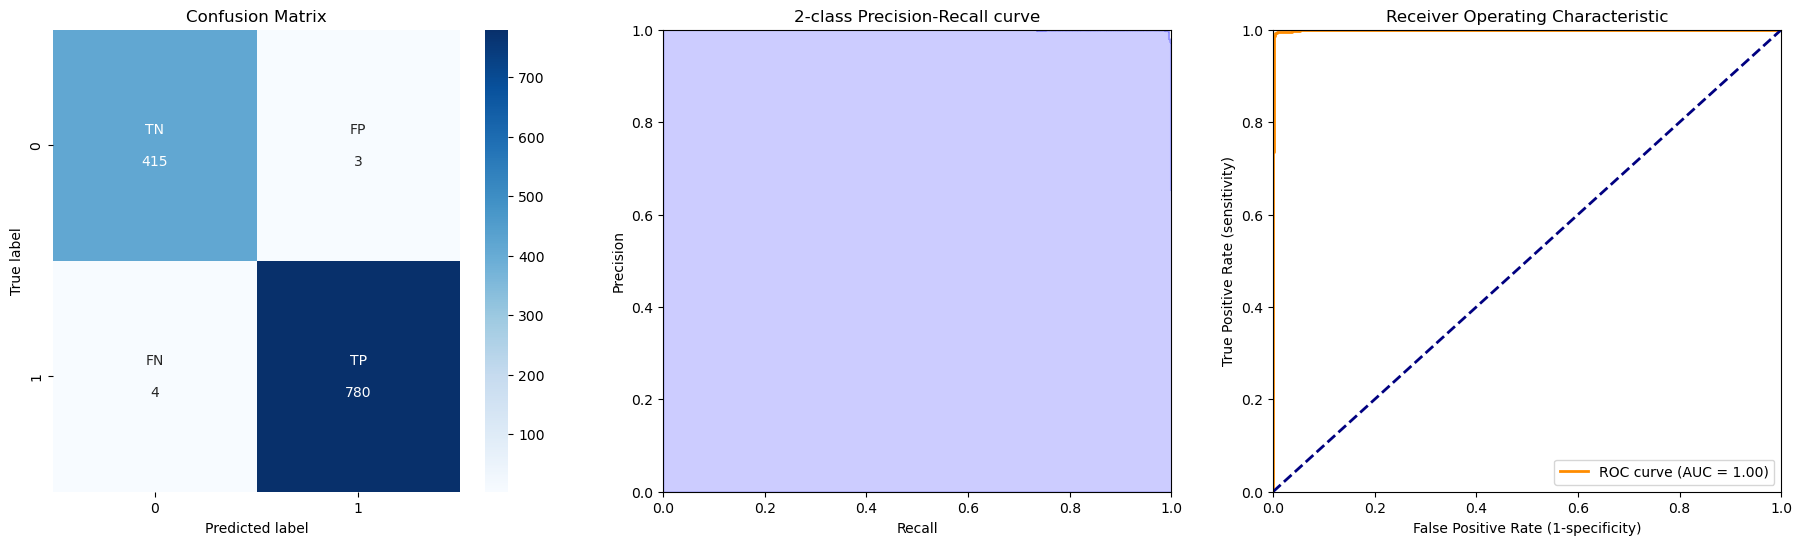

,Model,Set,Accuracy,Precision,Recall,F1-score,ROC_AUC
0,Neural Network,Train,0.994,0.996,0.995,0.996,0.994


In [250]:
## Print summary report including all plots and combine performance indicators of all models in a dataframe

# Create empty df with column headers
column_names = ['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC_AUC']
results_train = pd.DataFrame(columns=column_names)

# Model names
models = ['Neural Network']

# Iterate through models
for i, m in enumerate([model]):
    print(f'\n\033[1m{Fore.BLUE}{models[i]}{Style.RESET_ALL}\033[0m\n')
    
    # Summary report
    accuracy_, precision_, recall_, f1_, roc_auc_ = summary_report_nn(m, X_train, y_train)
    
    # Round values
    list = [accuracy_, precision_, recall_, f1_, roc_auc_]
    accuracy_, precision_, recall_, f1_, roc_auc_ = [round(x, 3) for x in list]
    
    # Add results to df
    results_train.loc[i] = {'Model': models[i], 'Set': 'Train', 'Accuracy': accuracy_, 'Precision': precision_,
                            'Recall': recall_, 'F1-score': f1_, 'ROC_AUC': roc_auc_}    

# Print dataframe with performance indicators for all models
print('\n')
results_train.sort_values(by='Model')

#### Evaluation of neural network-based models on testing data



Neural Network



10/10 [==============================] - 0s 2ms/step

10/10 [==============================] - 0s 2ms/step



Summary Report

Accuracy:  0.97 [TP / N] Proportion of predicted labels that match true labels

Precision: 0.98 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative

Recall:    0.97 [TP / (TP + FN)] Ability of the classifier to find all positive samples

F1-score:  0.98 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall

ROC AUC:   0.97

-----------------------------------------------------------------------------------------------------------------

TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples

----------------------------------------------------------------------------------------------------------------- 




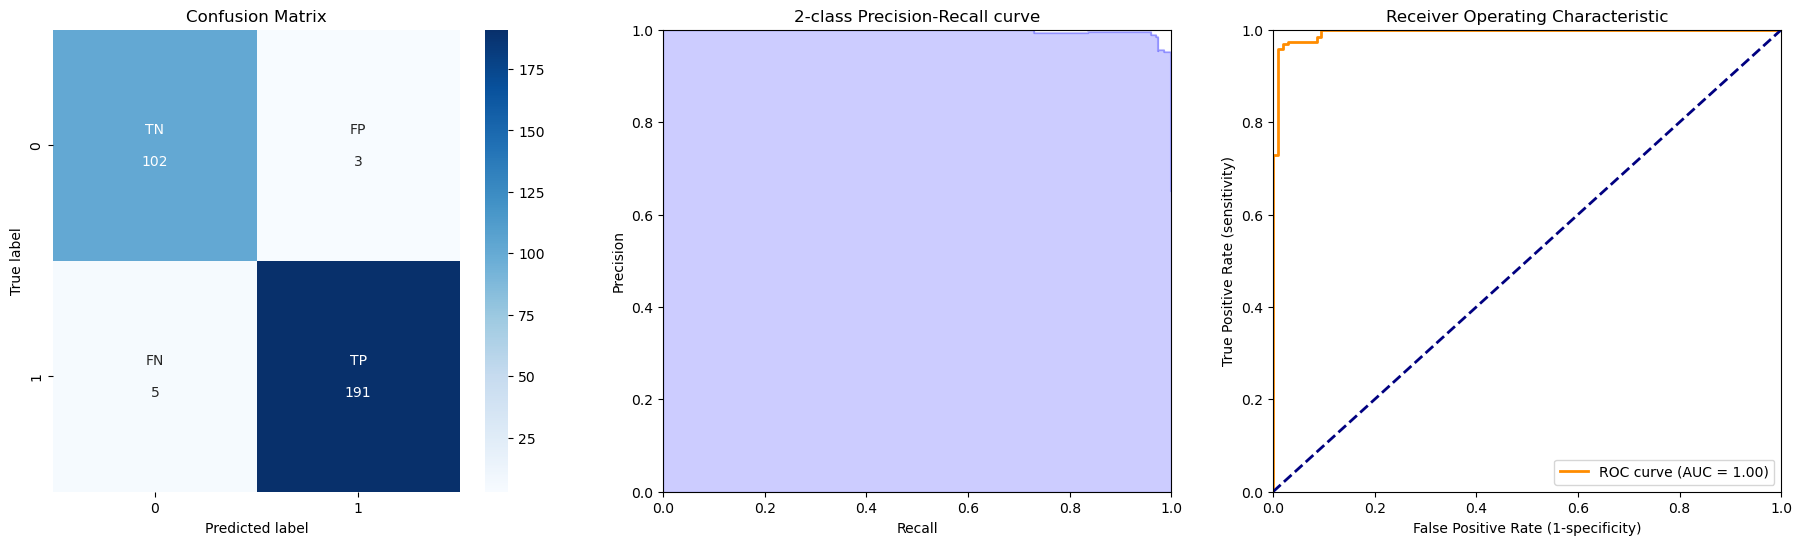

,Model,Set,Accuracy,Precision,Recall,F1-score,ROC_AUC
0,Neural Network,Train,0.994,0.996,0.995,0.996,0.994
1,Neural Network,Test,0.973,0.985,0.974,0.979,0.973


In [251]:
## Print summary report including all plots, combine performance indicators of all models and append to dataframe

results = results_train.copy()

# Model names
models = ['Neural Network']

# Iterate through models
for i, m in enumerate([model]):
    print(f'\n\033[1m{Fore.BLUE}{models[i]}{Style.RESET_ALL}\033[0m\n')
    
    # Summary report
    accuracy_, precision_, recall_, f1_, roc_auc_ = summary_report_nn(m, X_test, y_test)
    
    # Round values
    list = [accuracy_, precision_, recall_, f1_, roc_auc_]
    accuracy_, precision_, recall_, f1_, roc_auc_ = [round(x, 3) for x in list]
    
    # Add results to df
    results.loc[i+len(results_train)] = {'Model': models[i], 'Set': 'Test', 'Accuracy': accuracy_, 'Precision': precision_,
                                         'Recall': recall_, 'F1-score': f1_, 'ROC_AUC': roc_auc_}    

# Copy results
results_nn_models = results.copy()

# Print dataframe with performance indicators for all models
print('\n')
results.sort_values(by=['Model', 'Set'], ascending = [True, False])

## 6.5. Combined model results table

In [252]:
pd.concat([results_tree_models, results_nn_models]).sort_values(by=['Model', 'Set'], ascending = [True, False])

,Model,Set,Accuracy,Precision,Recall,F1-score,ROC_AUC
2,AdaBoost,Train,0.853,0.857,0.929,0.892,0.820
8,AdaBoost,Test,0.844,0.853,0.918,0.885,0.812
5,CatBoost,Train,1.000,1.000,1.000,1.000,1.000
11,CatBoost,Test,1.000,1.000,1.000,1.000,1.000
0,Decision Tree,Train,0.895,0.903,0.940,0.921,0.876
6,Decision Tree,Test,0.877,0.904,0.908,0.906,0.864
3,LightGBM,Train,1.000,1.000,1.000,1.000,1.000
9,LightGBM,Test,0.993,1.000,0.990,0.995,0.995
0,Neural Network,Train,0.994,0.996,0.995,0.996,0.994
1,Neural Network,Test,0.973,0.985,0.974,0.979,0.973


**Results**
* CatBoost and XGBoost are the best performers, closely followed by LightGBM 
* The neural network-based model performs slightly worse than LightGBM
* Decision Tree and Random Forest are midfield
* AdaBoost is the worst performer